# Creating Vectors

In [4]:
x <- c(0.5, 0.6) # numeric
y <- c(TRUE, FALSE) ## Logical
z <- c("a", "b", "c") #Character


## Explicit Coercion


In [5]:
x <- 0:6
class(x)

[1] "integer"

In [6]:
as.numeric(x)

[1] 0 1 2 3 4 5 6

In [7]:
as.logical(x)

[1] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE

In [8]:
as.character(x)

[1] "0" "1" "2" "3" "4" "5" "6"

## Matrices

In [9]:
m <- matrix(nrow=2, ncol=3)
m

NA,NA,NA
NA,NA,NA


In [10]:
dim(m)

[1] 2 3

In [11]:
attributes(m)

$dim
[1] 2 3

Matrices are constructed columnwise

m <- matrix(1:6, nrow=2, ncol=3)
m

matrix can also be constructed from Vectors using the dim() command

In [12]:
m <- 1:10
m

[1]  1  2  3  4  5  6  7  8  9 10

In [13]:
dim(m) <- c(2,5)
m

1,3,5,7,9
2,4,6,8,10


matrices can be created using column binding and row binding

In [14]:
x <- 1:3
y <- 10:12
cbind(x,y)

x,y
1,10
2,11
3,12


In [15]:
rbind(x,y)

x,1,2,3
y,10,11,12


## Factors

Factors are used to represent categorical data and can be unordered or ordered. One can think of
a factor as an integer vector where each integer has a label. Factors are important in statistical
modeling and are treated specially by modelling functions like lm() and glm().
Using factors with labels is better than using integers because factors are self-describing. Having a
variable that has values “Male” and “Female” is better than a variable that has values 1 and 2.
Factor objects can be created with the factor() function.

In [16]:
x <- factor(c("Yes","Yes","No","Yes","No"))
x

[1] Yes Yes No  Yes No 
Levels: No Yes

In [17]:
levels(x)

[1] "No"  "Yes"

In [18]:
table(x)

x
 No Yes 
  2   3 

Often factors will be automatically created for you when you read a dataset in using a function like
read.table(). Those functions often default to creating factors when they encounter data that look
like characters or strings.
The order of the levels of a factor can be set using the levels argument to factor(). This can be
important in linear modelling because the first level is used as the baseline level.

In [19]:
x <- factor(c("Yes","Yes","No","Yes","No"), levels=c("Yes","No"))
levels(x)

[1] "Yes" "No"

## Missing Values

Missing values are denoted by NA or NaN for q undefined mathematical operations.
 is.na() is used to test objects if they are NA
• is.nan() is used to test for NaN
• NA values have a class also, so there are integer NA, character NA, etc.
• A NaN value is also NA but the converse is not true

In [20]:
# create a vector with NAs in it
x <- c(1,2,NA,10,3)
# return logical vector indicating which elements are NA
is.na(x)


[1] FALSE FALSE  TRUE FALSE FALSE

## Data Frames

In [21]:
x <- data.frame(f00=1:4, bar=c(T,T,F,F))
x

f00,bar
1,TRUE
2,TRUE
3,FALSE
4,FALSE


In [22]:
nrow(x)
ncol(x)

[1] 4

[1] 2

## Names

In [23]:
x <- 1:3
names(x)

NULL

In [24]:
names(x) <- c("New York", "Seattle", "Los Angeles")
x

New York     Seattle Los Angeles 
          1           2           3

## Reading Data Files with read.table()

## Subsetting a Vector

In [25]:
x <- c("a","b","c","c","d","a")
x[1] # first element
x[2]  # second element

[1] "a"

[1] "b"

In [26]:
x[1:4]  # first to 4th element

[1] "a" "b" "c" "c"

In [27]:
u <- x > "a"
u

[1] FALSE  TRUE  TRUE  TRUE  TRUE FALSE

## Removing NA values

In [28]:
x <- c(1, 2, NA, 4, NA, 5)
bad <- is.na(x)
print(bad)

[1] FALSE FALSE  TRUE FALSE  TRUE FALSE


In [29]:
x[!bad]

[1] 1 2 4 5

In [30]:
head(airquality)

Ozone,Solar.R,Wind,Temp,Month,Day
41,190,7.4,67,5,1
36,118,8.0,72,5,2
12,149,12.6,74,5,3
18,313,11.5,62,5,4
NA,NA,14.3,56,5,5
28,NA,14.9,66,5,6


In [31]:
# we can use complete.cases on dataframes to eliminate missing values which returns logicals
good <- complete.cases(airquality)
head(airquality[good,])

,Ozone,Solar.R,Wind,Temp,Month,Day
1,41,190,7.4,67,5,1
2,36,118,8.0,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
7,23,299,8.6,65,5,7
8,19,99,13.8,59,5,8


## Vectorized operations

Many operations in R are vectorized, meaning that operations occur in parallel in certain R objects.
This allows you to write code that is efficient, concise, and easier to read than in non-vectorized
languages.

In [32]:
x <- 1:4
y <- 6:9
z <- x+y
z

[1]  7  9 11 13

In [33]:
x > 2

[1] FALSE FALSE  TRUE  TRUE

## Managing DataFrames with the DPLYR package

Some of the key “verbs” provided by the dplyr package are
1. select: return a subset of the columns of a data frame, using a f lexible notation
2. filter: extract a subset of rows from a data frame based on logical conditions
3. arrange: reorder rows of a data frame
4. rename: rename variables in a data frame
5. mutate: add new variables/columns or transform existing variables
6. summarise / summarize: generate summary statistics of different variables in the data frame,
possibly within strata
7• %>%: the “pipe” operator is used to connect multiple verb actions together into a pipeline

## Common dplyr Function Properties

All of the functions that we will discuss in this Chapter will have a few common characteristics. In
particular,
1. The first argument is a data frame.
2. The subsequent arguments describe what to do with the data frame specified in the first
argument, and you can refer to columns in the data frame directly without using the $ operator
( just use the column names).
3. The return result of a function is a new data frame
4. Data frames must be properly formatted and annotated for this to all be useful. In particular,
the data must be tidy⁵². In short, there should be one observation per row, and each column
should represent a feature or characteristic of that observation.

In [34]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [35]:
chicago <- readRDS("chicago.rds")
dim(chicago)

[1] 6940    8

In [36]:
# display structure of dataFrame
str(chicago)

'data.frame':	6940 obs. of  8 variables:
 $ city      : chr  "chic" "chic" "chic" "chic" ...
 $ tmpd      : num  31.5 33 33 29 32 40 34.5 29 26.5 32.5 ...
 $ dptp      : num  31.5 29.9 27.4 28.6 28.9 ...
 $ date      : Date, format: "1987-01-01" "1987-01-02" ...
 $ pm25tmean2: num  NA NA NA NA NA NA NA NA NA NA ...
 $ pm10tmean2: num  34 NA 34.2 47 NA ...
 $ o3tmean2  : num  4.25 3.3 3.33 4.38 4.75 ...
 $ no2tmean2 : num  20 23.2 23.8 30.4 30.3 ...


The select() function can be used to select columns of a data frame that you want to focus on.
Often you’ll have a large data frame containing “all” of the data, but any given analysis might only
use a subset of variables or observations. The select() function allows you to get the few columns
you might need.
Suppose we wanted to take the first 3 columns only. There are a few ways to do this. We could for
example use numerical indices. But we can also use the names directly.

In [37]:
names(chicago)[1:3]

[1] "city" "tmpd" "dptp"

In [38]:
subset <- select(chicago, city:dptp)
head(subset)

city,tmpd,dptp
chic,31.5,31.500
chic,33.0,29.875
chic,33.0,27.375
chic,29.0,28.625
chic,32.0,28.875
chic,40.0,35.125


Note that the : normally cannot be used with names or strings, but inside the select() function
you can use it to specify a range of variable names.
You can also omit variables using the select() function by using the negative sign. With select()
you can do

In [39]:
select(chicago, -(city:dptp))

date,pm25tmean2,pm10tmean2,o3tmean2,no2tmean2
1987-01-01,NA,34.00000,4.250000,19.98810
1987-01-02,NA,NA,3.304348,23.19099
1987-01-03,NA,34.16667,3.333333,23.81548
1987-01-04,NA,47.00000,4.375000,30.43452
1987-01-05,NA,NA,4.750000,30.33333
1987-01-06,NA,48.00000,5.833333,25.77233
1987-01-07,NA,41.00000,9.291667,20.58171
1987-01-08,NA,36.00000,11.291667,17.03723
1987-01-09,NA,33.28571,4.500000,23.38889
1987-01-10,NA,NA,4.958333,19.54167


The select() function also allows a special syntax that allows you to specify variable names based
on patterns. So, for example, if you wanted to keep every variable that ends with a “2”, we could do

In [40]:
# selecting variables which end with 2
subset <- select(chicago, ends_with("2"))
str(subset)

'data.frame':	6940 obs. of  4 variables:
 $ pm25tmean2: num  NA NA NA NA NA NA NA NA NA NA ...
 $ pm10tmean2: num  34 NA 34.2 47 NA ...
 $ o3tmean2  : num  4.25 3.3 3.33 4.38 4.75 ...
 $ no2tmean2 : num  20 23.2 23.8 30.4 30.3 ...


### Filter()

The filter() function is used to extract subsets of rows from a data frame. This function is similar
to the existing subset() function in R but is quite a bit faster in my experience.
Suppose we wanted to extract the rows of the chicago data frame where the levels of PM2.5 are
greater than 30 (which is a reasonably high level), we could do

In [41]:
# select those where mean is > 30
chic.f <- filter(chicago, pm25tmean2 > 30)
str(chic.f)

'data.frame':	194 obs. of  8 variables:
 $ city      : chr  "chic" "chic" "chic" "chic" ...
 $ tmpd      : num  23 28 55 59 57 57 75 61 73 78 ...
 $ dptp      : num  21.9 25.8 51.3 53.7 52 56 65.8 59 60.3 67.1 ...
 $ date      : Date, format: "1998-01-17" "1998-01-23" ...
 $ pm25tmean2: num  38.1 34 39.4 35.4 33.3 ...
 $ pm10tmean2: num  32.5 38.7 34 28.5 35 ...
 $ o3tmean2  : num  3.18 1.75 10.79 14.3 20.66 ...
 $ no2tmean2 : num  25.3 29.4 25.3 31.4 26.8 ...


In [42]:
summary(chic.f$pm25tmean2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  30.05   32.12   35.04   36.63   39.53   61.50 

We can place an arbitrarily complex logical sequence inside of filter(), so we could for example
extract the rows where PM2.5 is greater than 30 and temperature is greater than 80 degrees
Fahrenheit.

In [43]:
chic.f <- filter(chicago, pm25tmean2>30 & tmpd>80)
select(chic.f, date, tmpd, pm25tmean2)

date,tmpd,pm25tmean2
1998-08-23,81,39.60000
1998-09-06,81,31.50000
2001-07-20,82,32.30000
2001-08-01,84,43.70000
2001-08-08,85,38.83750
2001-08-09,84,38.20000
2002-06-20,82,33.00000
2002-06-23,82,42.50000
2002-07-08,81,33.10000
2002-07-18,82,38.85000


### arrange()

The arrange() function is used to reorder rows of a data frame according to one of the variables/columns.
Reordering rows of a data frame (while preserving corresponding order of other columns)
is normally a pain to do in R. The arrange() function simplifies the process quite a bit.
Here we can order the rows of the data frame by date, so that the first row is the earliest (oldest)
observation and the last row is the latest (most recent) observation.

In [44]:
# arranging by date and selecting first 3 rows
chicago <- arrange(chicago, date)
head(select(chicago, date, pm25tmean2), 3)

date,pm25tmean2
1987-01-01,NA
1987-01-02,NA
1987-01-03,NA


### rename()
Renaming a variable in a data frame in R is surprisingly hard to do! The rename() function designed to make this process easier.
Here you can see the names of the first five variables in the chicago data frame.

In [45]:
head(chicago[ ,1:5],3)

city,tmpd,dptp,date,pm25tmean2
chic,31.5,31.500,1987-01-01,NA
chic,33.0,29.875,1987-01-02,NA
chic,33.0,27.375,1987-01-03,NA


In [46]:
chicago <- rename(chicago, dewpoint=dptp, pm25 = pm25tmean2)
head(chicago[ ,1:5],3)

city,tmpd,dewpoint,date,pm25
chic,31.5,31.500,1987-01-01,NA
chic,33.0,29.875,1987-01-02,NA
chic,33.0,27.375,1987-01-03,NA


The syntax inside the rename() function is to have the new name on the left-hand side of the = sign
and the old name on the right-hand side.

### mutate()
The mutate() function exists to compute transformations of variables in a data frame. Often, you
want to create new variables that are derived from existing variables and mutate() provides a clean
interface for doing that.
For example, with air pollution data, we often want to detrend the data by subtracting the mean
from the data. That way we can look at whether a given day’s air pollution level is higher than or
less than average (as opposed to looking at its absolute level).
Here we create a pm25detrend variable that subtracts the mean from the pm25 variable.

In [47]:
chicago <- mutate(chicago, pm25detrend = pm25 - mean(pm25, na.rm=TRUE))
head(chicago)

city,tmpd,dewpoint,date,pm25,pm10tmean2,o3tmean2,no2tmean2,pm25detrend
chic,31.5,31.500,1987-01-01,NA,34.00000,4.250000,19.98810,NA
chic,33.0,29.875,1987-01-02,NA,NA,3.304348,23.19099,NA
chic,33.0,27.375,1987-01-03,NA,34.16667,3.333333,23.81548,NA
chic,29.0,28.625,1987-01-04,NA,47.00000,4.375000,30.43452,NA
chic,32.0,28.875,1987-01-05,NA,NA,4.750000,30.33333,NA
chic,40.0,35.125,1987-01-06,NA,48.00000,5.833333,25.77233,NA


### group_by()
The group_by() function is used to generate summary statistics from the data frame within strata
defined by a variable. For example, in this air pollution dataset, you might want to know what the
average annual level of PM2.5 is. So the stratum is the year, and that is something we can derive
from the date variable. In conjunction with the group_by() function we often use the summarize()
function (or summarise() for some parts of the world).
The general operation here is a combination of splitting a data frame into separate pieces defined by
a variable or group of variables (group_by()), and then applying a summary function across those
subsets (summarize()).
First, we can create a year varible using as.POSIXlt().

In [48]:
chicago <- mutate(chicago, year=as.POSIXlt(date)$year + 1900)

years <- group_by(chicago, year)

In [49]:

summarize(years, pm25 = mean(pm25, na.rm=TRUE), o3 = max(o3tmean2, na.rm=TRUE), n02 = median(no2tmean2, na.rm=TRUE))

year,pm25,o3,n02
1987,NaN,62.96966,23.49369
1988,NaN,61.67708,24.52296
1989,NaN,59.72727,26.14062
1990,NaN,52.22917,22.59583
1991,NaN,63.10417,21.38194
1992,NaN,50.82870,24.78921
1993,NaN,44.30093,25.76993
1994,NaN,52.17844,28.47500
1995,NaN,66.58750,27.26042
1996,NaN,58.39583,26.38715


### %>% Pipeline operator
The pipeline operater %>% is very handy for stringing together multiple dplyr functions in a sequence
of operations. Notice above that every time we wanted to apply more than one function, the sequence
gets buried in a sequence of nested function calls that is difficult to read, i.e.

#### first(x) %>% second(x) %>% third(x)
Another example might be computing the average pollutant level by month. This could be useful to
see if there are any seasonal trends in the data.

In [50]:
mutate(chicago, month = as.POSIXlt(date)$mon + 1) %>% group_by(month) %>% summarize(
pm25 = mean(pm25, na.rm=TRUE), o3=max(o3tmean2, na.rm=TRUE), no2=median(no2tmean2, na.rm=TRUE))

month,pm25,o3,no2
1,17.76996,28.22222,25.35417
2,20.37513,37.37500,26.78034
3,17.40818,39.05000,26.76984
4,13.85879,47.94907,25.03125
5,14.07420,52.75000,24.22222
6,15.86461,66.58750,25.01140
7,16.57087,59.54167,22.38442
8,16.93380,53.96701,22.98333
9,15.91279,57.48864,24.47917
10,14.23557,47.09275,24.15217


### Summary 
The dplyr package provides a concise set of operations for managing data frames. With these
functions we can do a number of complex operations in just a few lines of code. In particular,
we can often conduct the beginnings of an exploratory analysis with the powerful combination of
group_by() and summarize().
Once you learn the dplyr grammar there are a few additional benefits
1. dplyr can work with other data frame “backends” such as SQL databases. There is an SQL
interface for relational databases via the DBI package
2. dplyr can be integrated with the data.table package for large fast tables
The dplyr package is handy way to both simplify and speed up your data frame management code.
It’s rare that you get such a combination at the same time!

In [51]:
library(hflights)
head(hflights)

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
5424,2011,1,1,6,1400,1500,AA,428,N576AA,60,...,-10,0,IAH,DFW,224,7,13,0,,0
5425,2011,1,2,7,1401,1501,AA,428,N557AA,60,...,-9,1,IAH,DFW,224,6,9,0,,0
5426,2011,1,3,1,1352,1502,AA,428,N541AA,70,...,-8,-8,IAH,DFW,224,5,17,0,,0
5427,2011,1,4,2,1403,1513,AA,428,N403AA,70,...,3,3,IAH,DFW,224,9,22,0,,0
5428,2011,1,5,3,1405,1507,AA,428,N492AA,62,...,-3,5,IAH,DFW,224,9,9,0,,0
5429,2011,1,6,4,1359,1503,AA,428,N262AA,64,...,-7,-1,IAH,DFW,224,6,13,0,,0


In [52]:
hflights_df <- tbl_df(hflights)
class(hflights_df)

[1] "tbl_df"     "tbl"        "data.frame"

In [53]:
hflights_df

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
5424,2011,1,1,6,1400,1500,AA,428,N576AA,60,...,-10,0,IAH,DFW,224,7,13,0,,0
5425,2011,1,2,7,1401,1501,AA,428,N557AA,60,...,-9,1,IAH,DFW,224,6,9,0,,0
5426,2011,1,3,1,1352,1502,AA,428,N541AA,70,...,-8,-8,IAH,DFW,224,5,17,0,,0
5427,2011,1,4,2,1403,1513,AA,428,N403AA,70,...,3,3,IAH,DFW,224,9,22,0,,0
5428,2011,1,5,3,1405,1507,AA,428,N492AA,62,...,-3,5,IAH,DFW,224,9,9,0,,0
5429,2011,1,6,4,1359,1503,AA,428,N262AA,64,...,-7,-1,IAH,DFW,224,6,13,0,,0
5430,2011,1,7,5,1359,1509,AA,428,N493AA,70,...,-1,-1,IAH,DFW,224,12,15,0,,0
5431,2011,1,8,6,1355,1454,AA,428,N477AA,59,...,-16,-5,IAH,DFW,224,7,12,0,,0
5432,2011,1,9,7,1443,1554,AA,428,N476AA,71,...,44,43,IAH,DFW,224,8,22,0,,0
5433,2011,1,10,1,1443,1553,AA,428,N504AA,70,...,43,43,IAH,DFW,224,6,19,0,,0


In [54]:
## group data by plane
planes <- group_by(hflights_df,TailNum)
head(planes)

Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
2011,1,1,6,1400,1500,AA,428,N576AA,60,...,-10,0,IAH,DFW,224,7,13,0,,0
2011,1,2,7,1401,1501,AA,428,N557AA,60,...,-9,1,IAH,DFW,224,6,9,0,,0
2011,1,3,1,1352,1502,AA,428,N541AA,70,...,-8,-8,IAH,DFW,224,5,17,0,,0
2011,1,4,2,1403,1513,AA,428,N403AA,70,...,3,3,IAH,DFW,224,9,22,0,,0
2011,1,5,3,1405,1507,AA,428,N492AA,62,...,-3,5,IAH,DFW,224,9,9,0,,0
2011,1,6,4,1359,1503,AA,428,N262AA,64,...,-7,-1,IAH,DFW,224,6,13,0,,0


In [55]:
# summary statistics by plane
delay2 <- summarize(planes, count=n(), dist=mean(Distance, na.rm=TRUE), delay=mean(ArrDelay, na.rm=T))
delay2

TailNum,count,dist,delay
,795,938.7157,NaN
N0EGMQ,40,1095.2500,1.918919
N10156,317,801.7192,8.199357
N10575,94,631.5319,18.148936
N11106,308,774.9805,10.101639
N11107,345,768.1130,8.052786
N11109,331,772.4532,10.280000
N11113,282,772.8298,4.057143
N11119,130,790.2385,7.396825
N11121,333,774.8018,6.740854


### aggregate functions
The function n() is one of several aggregate functions that are useful to employ with summarise on grouped data. Besides the typical ones like mean, max, etc., there are also n_distinct, first, last, nth()

In [56]:
destinations <- group_by(hflights_df, Dest)
summarise(destinations, planes=n_distinct(TailNum), flights=n())


Dest,planes,flights
ABQ,716,2812
AEX,215,724
AGS,1,1
AMA,158,1297
ANC,38,125
ASE,60,125
ATL,983,7886
AUS,1015,5022
AVL,142,350
BFL,70,504


### Grouping by multiple variables
When we do this we have the ability to easily compute summary stats by different combinations of the grouping variables.

Suppose we group the data into daily flights.

In [57]:
daily <- group_by(hflights_df, Year, Month, DayofMonth)
# no of flights per day
per_day <- summarize(daily, number_flights=n())
per_day

Year,Month,DayofMonth,number_flights
2011,1,1,552
2011,1,2,678
2011,1,3,702
2011,1,4,583
2011,1,5,590
2011,1,6,660
2011,1,7,661
2011,1,8,500
2011,1,9,602
2011,1,10,659


In [58]:
per_month <- summarize(per_day, number_flights=sum(number_flights))
per_month

Year,Month,number_flights
2011,1,18910
2011,2,17128
2011,3,19470
2011,4,18593
2011,5,19172
2011,6,19600
2011,7,20548
2011,8,20176
2011,9,18065
2011,10,18696


### Chanining
There is a nice way to pass the result of one function to another. This is possible because so many dplyr functions take a data table as input and output another data table.

For example:

In [59]:
a1 <- group_by(hflights, Year, Month, DayofMonth)
a2 <- select(a1, Year:DayofMonth, ArrDelay, DepDelay)
a3 <- summarize(a2, arr=mean(ArrDelay, na.rm=T), dep=mean(DepDelay, na.rm=T))
a4 <- filter(a3, arr>30 | dep>30)
a4

Year,Month,DayofMonth,arr,dep
2011,2,4,44.08088,47.17216
2011,3,3,35.12898,38.20064
2011,3,14,46.63830,36.13657
2011,4,4,38.71651,27.94915
2011,4,25,37.79845,22.25574
2011,5,12,69.52046,64.52039
2011,5,20,37.02857,26.55090
2011,6,22,65.51852,62.30979
2011,7,29,29.55755,31.86944
2011,9,29,39.19649,32.49528


In [60]:
hflights %>% group_by(Year, Month, DayofMonth) %>% select(Year:DayofMonth, ArrDelay, DepDelay) %>% summarize(
arr=mean(ArrDelay, na.rm=T), dep=mean(DepDelay, na.rm=T)) %>% filter(arr>30 | dep>30)

Year,Month,DayofMonth,arr,dep
2011,2,4,44.08088,47.17216
2011,3,3,35.12898,38.20064
2011,3,14,46.63830,36.13657
2011,4,4,38.71651,27.94915
2011,4,25,37.79845,22.25574
2011,5,12,69.52046,64.52039
2011,5,20,37.02857,26.55090
2011,6,22,65.51852,62.30979
2011,7,29,29.55755,31.86944
2011,9,29,39.19649,32.49528


# Control Structures

In [61]:
# using if else, generate a uniform random number
x <- runif(1,0,10)
if(x>3) {
    y <- 10
    } else {
    y <- 0
}

x
y

[1] 8.032976

[1] 10

In [62]:
## for loops
for(i in 1:10) {
    print(i)
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10


In [63]:
x <- c("a","b","c","d")
for (i in 1:4) {
    print(x[i])
}

[1] "a"
[1] "b"
[1] "c"
[1] "d"


# Simulation

1. rnorm: generate random Normal variates with a given mean and standard deviation
2. dnorm: evaluate the Normal probability density (with a given mean/SD) at a point (or vector
of points)
3. pnorm: evaluate the cumulative distribution function for a Normal distribution
4. rpois: generate random Poisson variates with a given rate

In [64]:
## simulate standard normal random numbers
x <- rnorm(10)
x

[1]  1.79801419 -1.30603058  0.11618423  0.41375158 -1.26574486  0.52056760
 [7] -1.23636801 -1.44631668 -0.20416983 -0.08467554

In [65]:
summary(x)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1.4460 -1.2580 -0.1444 -0.2695  0.3394  1.7980 

In [66]:
## modify mean 20 and SD of 2
x <- rnorm(10,20,2)
summary(x)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.55   18.61   19.99   19.84   21.06   21.99 

If you wanted to know what was the probability of a random Normal variable of being less than,
say, 2, you could use the pnorm() function to do that calculation.

In [67]:
pnorm(2)

[1] 0.9772499

In [68]:
## sampling rows from a dataframe
library(datasets)
data(airquality)
head(airquality)

Ozone,Solar.R,Wind,Temp,Month,Day
41,190,7.4,67,5,1
36,118,8.0,72,5,2
12,149,12.6,74,5,3
18,313,11.5,62,5,4
NA,NA,14.3,56,5,5
28,NA,14.9,66,5,6


In [69]:
# create index vector and sample from rows of index vector
idx <- seq_len(nrow(airquality))

# sample from the index vector
samp <- sample(idx, 6)

airquality[samp, ]

,Ozone,Solar.R,Wind,Temp,Month,Day
142,24,238,10.3,68,9,19
135,21,259,15.5,76,9,12
61,NA,138,8.0,83,6,30
39,NA,273,6.9,87,6,8
124,96,167,6.9,91,9,1
147,7,49,10.3,69,9,24


## case Study

In [70]:
# reading the 1999 data
pm0 <- read.table("RD_501_88101_1999-0.txt", comment.char = "#", header=FALSE, sep="|", na.strings="")
dim(pm0)


[1] 117421     28

In [71]:
head(pm0[,1:10])

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
RD,I,1,27,1,88101,1,7,105,120
RD,I,1,27,1,88101,1,7,105,120
RD,I,1,27,1,88101,1,7,105,120
RD,I,1,27,1,88101,1,7,105,120
RD,I,1,27,1,88101,1,7,105,120
RD,I,1,27,1,88101,1,7,105,120


In [72]:
cnames <- readLines("RD_501_88101_1999-0.txt", 1)
cnames <- strsplit(cnames, "|", fixed = TRUE)
names(pm0) <- make.names(cnames[[1]])
head(pm0[, 1:13])



X..RD,Action.Code,State.Code,County.Code,Site.ID,Parameter,POC,Sample.Duration,Unit,Method,Date,Start.Time,Sample.Value
RD,I,1,27,1,88101,1,7,105,120,19990103,00:00,NA
RD,I,1,27,1,88101,1,7,105,120,19990106,00:00,NA
RD,I,1,27,1,88101,1,7,105,120,19990109,00:00,NA
RD,I,1,27,1,88101,1,7,105,120,19990112,00:00,8.841
RD,I,1,27,1,88101,1,7,105,120,19990115,00:00,14.920
RD,I,1,27,1,88101,1,7,105,120,19990118,00:00,3.878


In [73]:
x0 <- pm0$Sample.Value
summary(x0)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    7.20   11.50   13.74   17.90  157.10   13217 

In [74]:
# lets check proportion of missing values
mean(is.na(x0))

[1] 0.1125608

In [75]:
# Reading the 2012 data
pm1 <- read.table("RD_501_88101_2012-0.txt", comment.char = "#", header = FALSE, sep = "|", na.strings = "", nrow = 1304290)

cnames <- readLines("RD_501_88101_2012-0.txt", 1)
cnames <- strsplit(cnames, "|", fixed = TRUE)
names(pm1) <- make.names(cnames[[1]])
x1 <- pm1$Sample.Value

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
"EOF within quoted string"

In [76]:
x1

NULL

Warning message in bplt(at[i], wid = width[i], stats = z$stats[, i], out = z$out[z$group == :
"Outlier (-Inf) in boxplot 1 is not drawn"

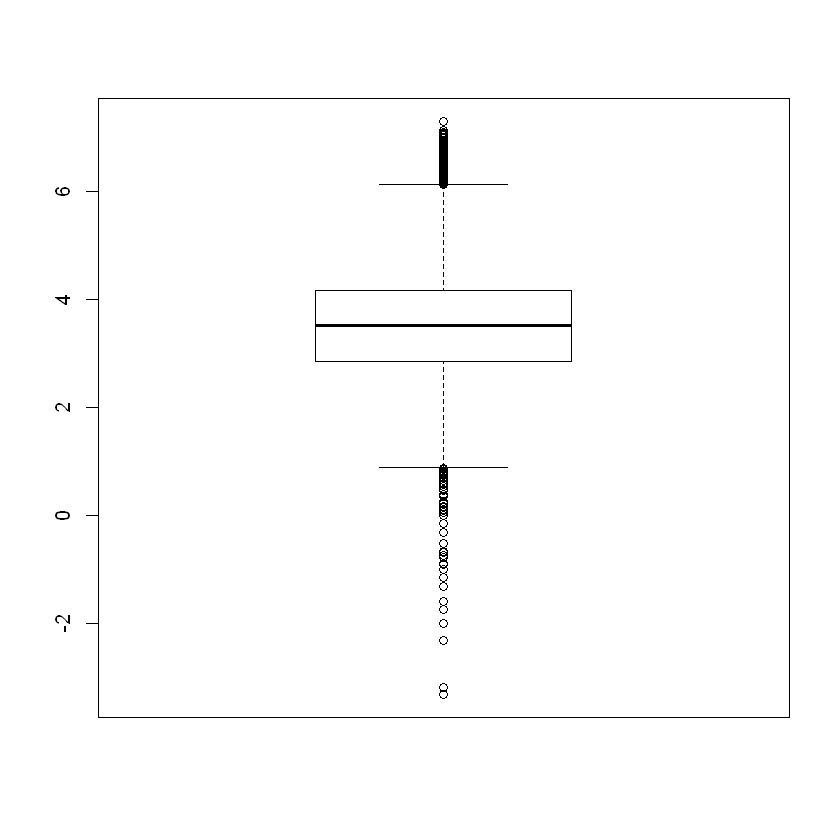

In [77]:
boxplot(log2(x0))


## Graphs in R

## Box plots


In [78]:
attach(mtcars)
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


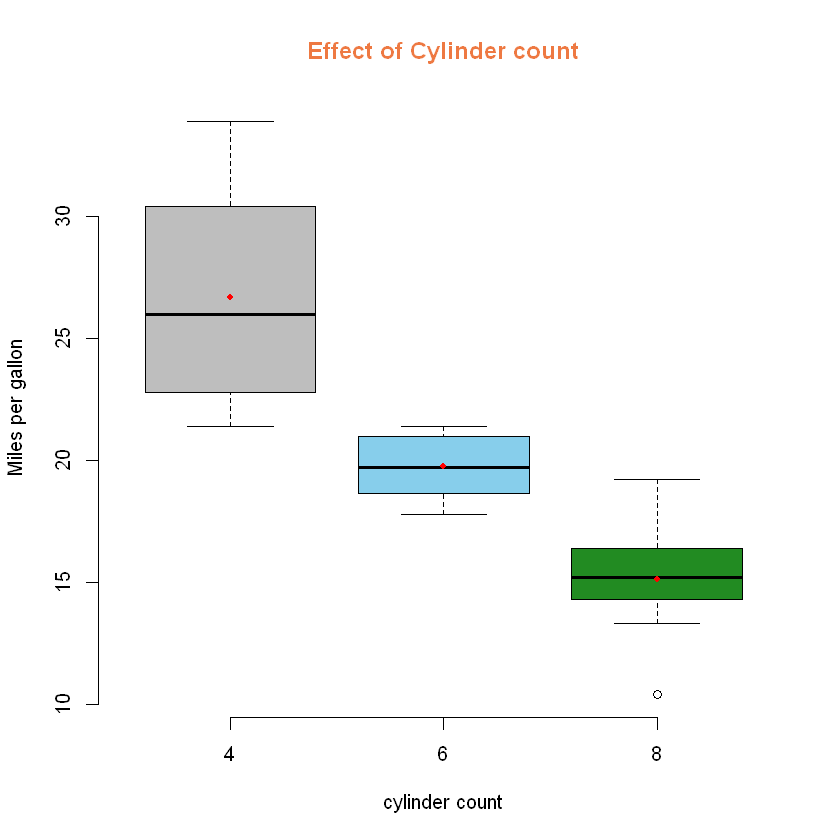

In [79]:
par(bty="n") # remove box around the boxplot
boxplot(mpg~cyl, ylab="Miles per gallon", main = "Effect of Cylinder count",
       xlab="cylinder count", cex.main=1.2, col.main="sienna2", 
        names=c("4","6","8"), col=c("grey","skyblue", "forestgreen"))

## incorporating means in our boxplot
means = by(mpg, cyl, mean)
points(means, col="red", pch=20)

## Histogram

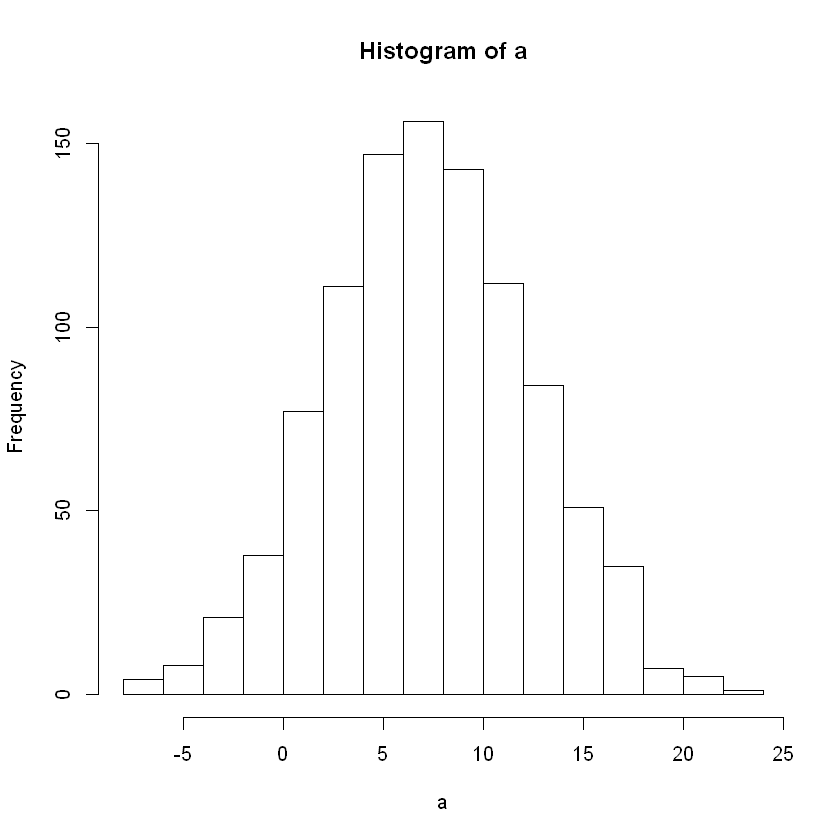

In [80]:
set.seed(2)
a = rnorm(1000,7,5)
b=rnorm(1000,7,6)
ab=data.frame(a,b)

#simple histogtam
hist(a)

## ggplot2


Attaching package: 'ggplot2'

The following object is masked from 'mtcars':

    mpg

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


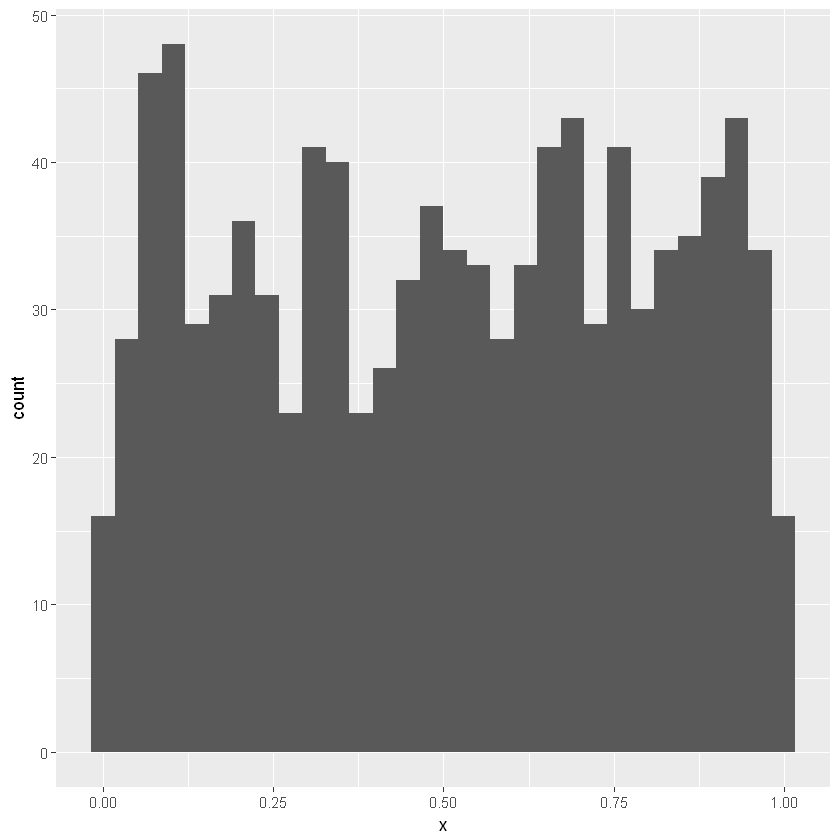

In [81]:
library(ggplot2)
x=runif(1000)
qplot(x)

In [82]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


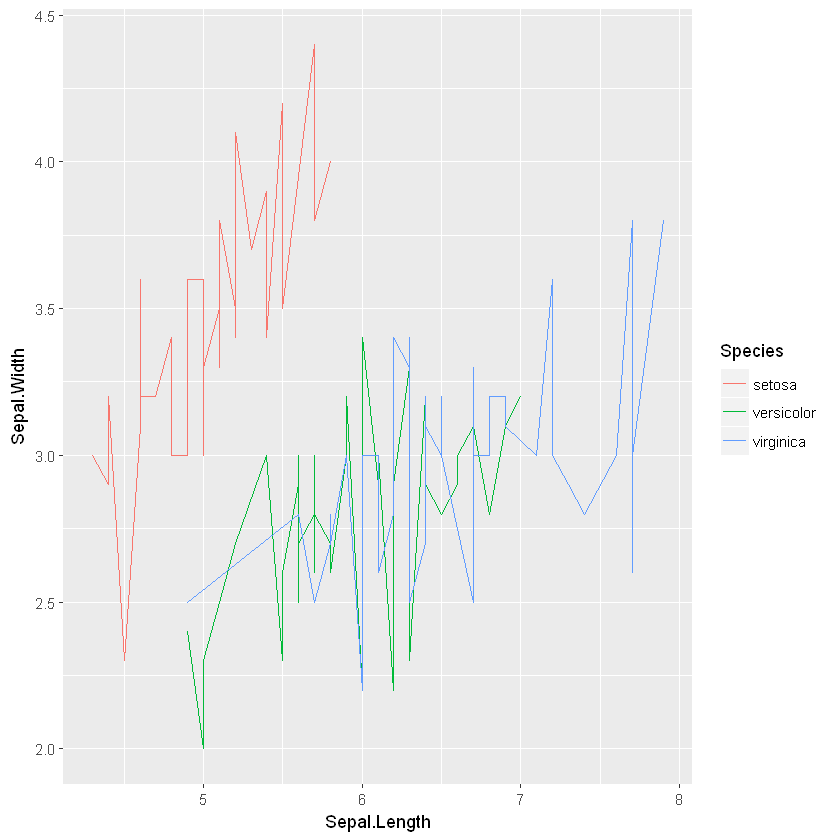

In [83]:
# line plot for time series
qplot(x=Sepal.Length, y=Sepal.Width, data=iris, color=Species, geom="line")

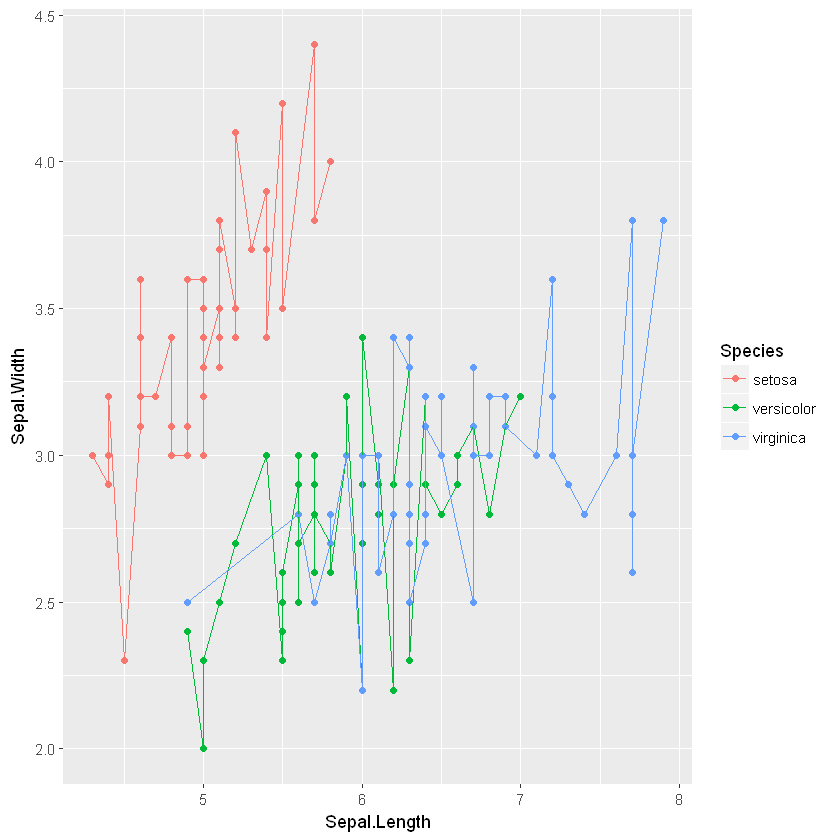

In [84]:
# we can also just add the geom

qplot(x=Sepal.Length, y=Sepal.Width, data=iris, color=Species) + geom_line()

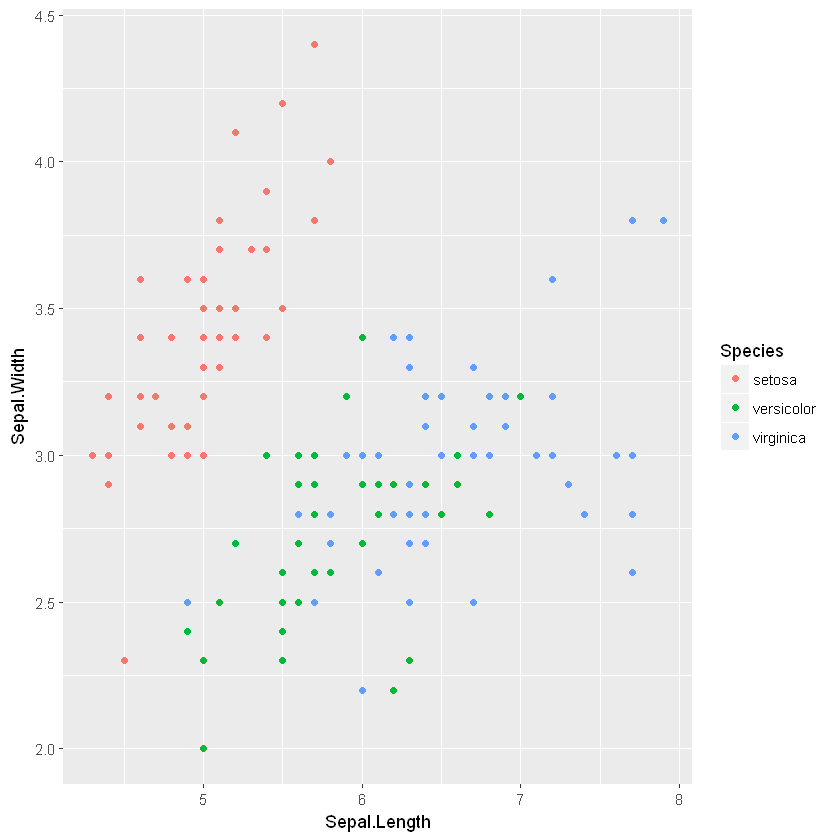

In [85]:
# Creating a scatterplot
qplot(x=Sepal.Length, y=Sepal.Width, data=iris, color=Species, geom="point")

`geom_smooth()` using method = 'loess'


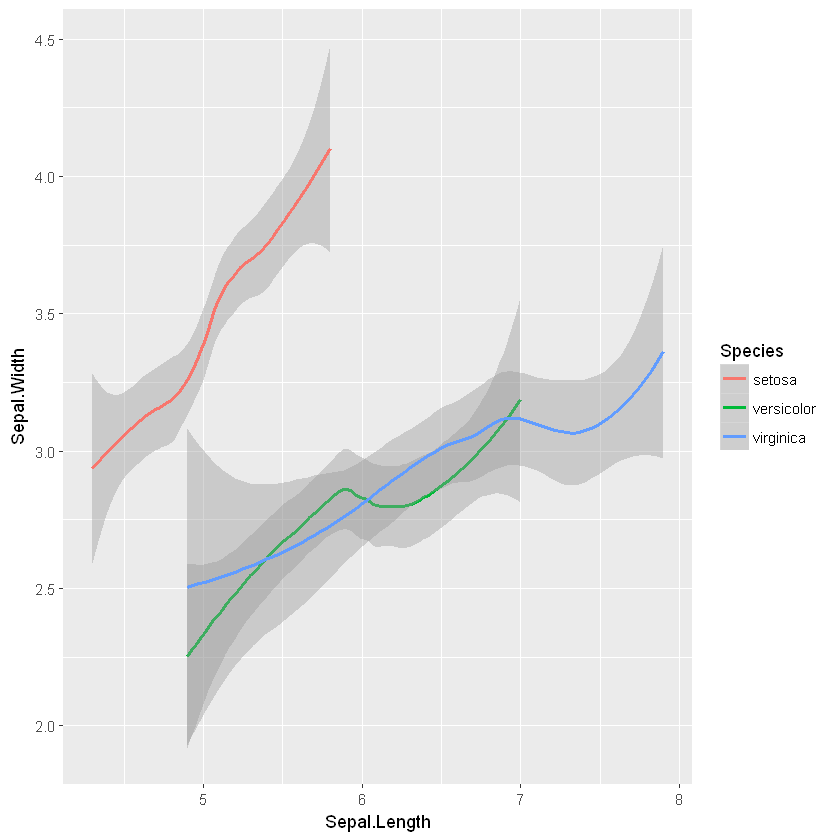

In [86]:
## smoothers
qplot(x=Sepal.Length, y=Sepal.Width, data=iris, color=Species, geom="smooth")

In [87]:
# boxplots
head(iris) #categorical variables for boxplots

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


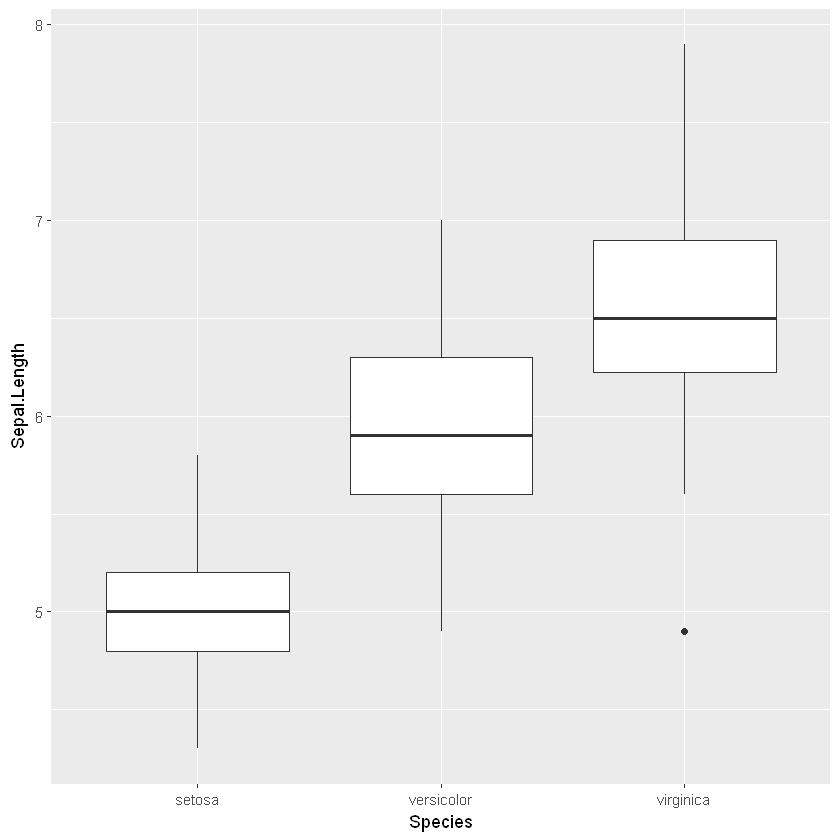

In [88]:
qplot(Species, Sepal.Length, data=iris, geom="boxplot")

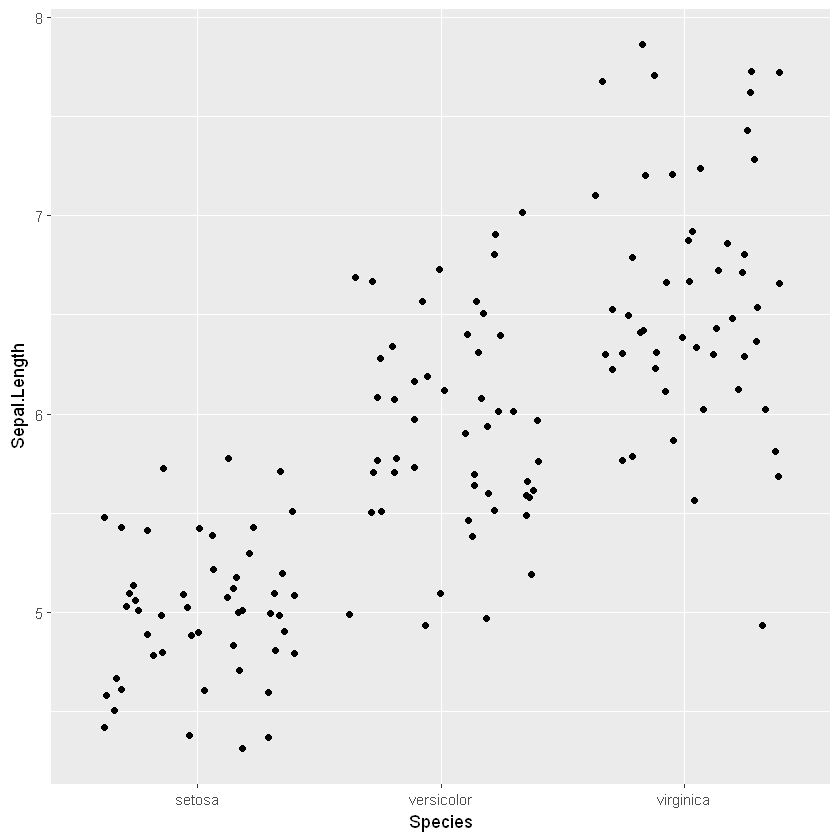

In [89]:
# jitter shows same info
qplot(Species, Sepal.Length, data=iris, geom="jitter")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


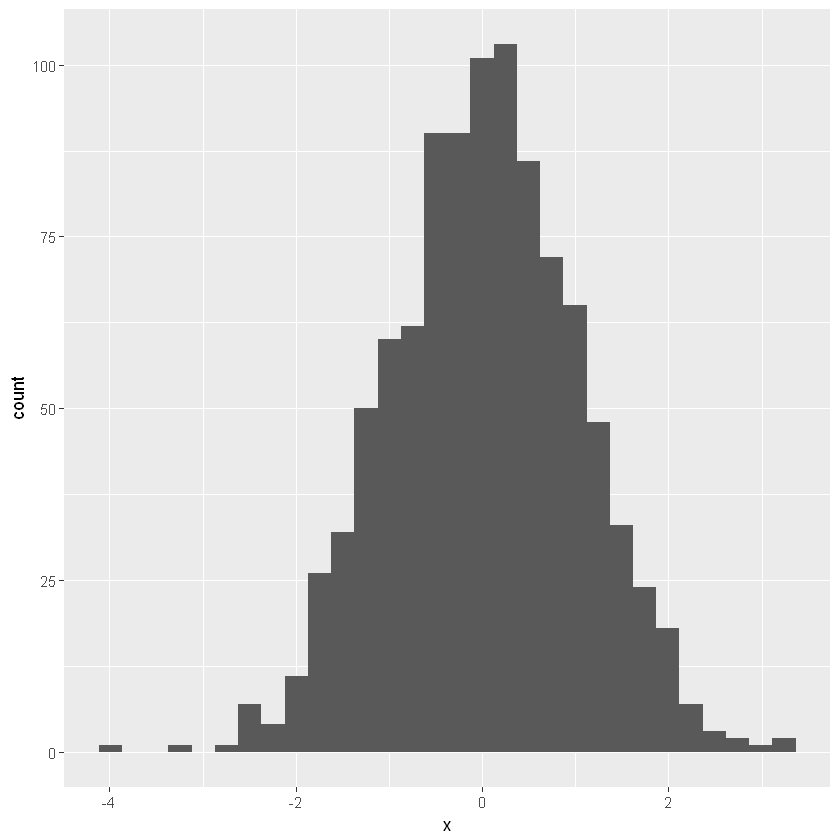

In [90]:
# Histograms
x = rnorm(1000)
qplot(x, geom="histogram")

Warning message:
"Removed 4 rows containing non-finite values (stat_bin)."

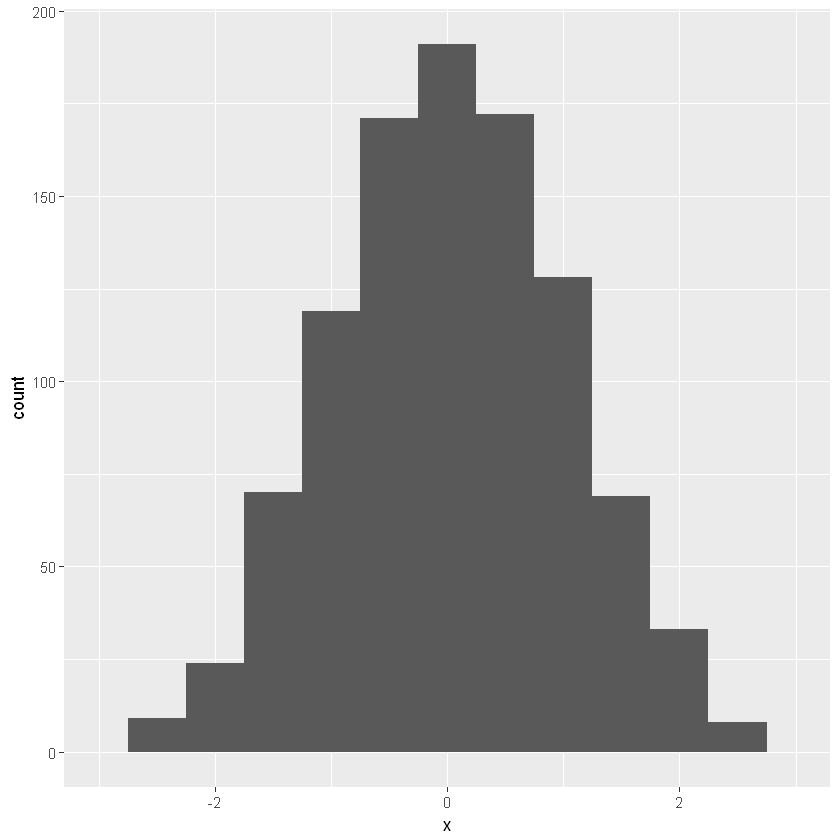

In [91]:
# using binwidth
qplot(x, geom="histogram", binwidth=0.5, xlim=c(-3,3))

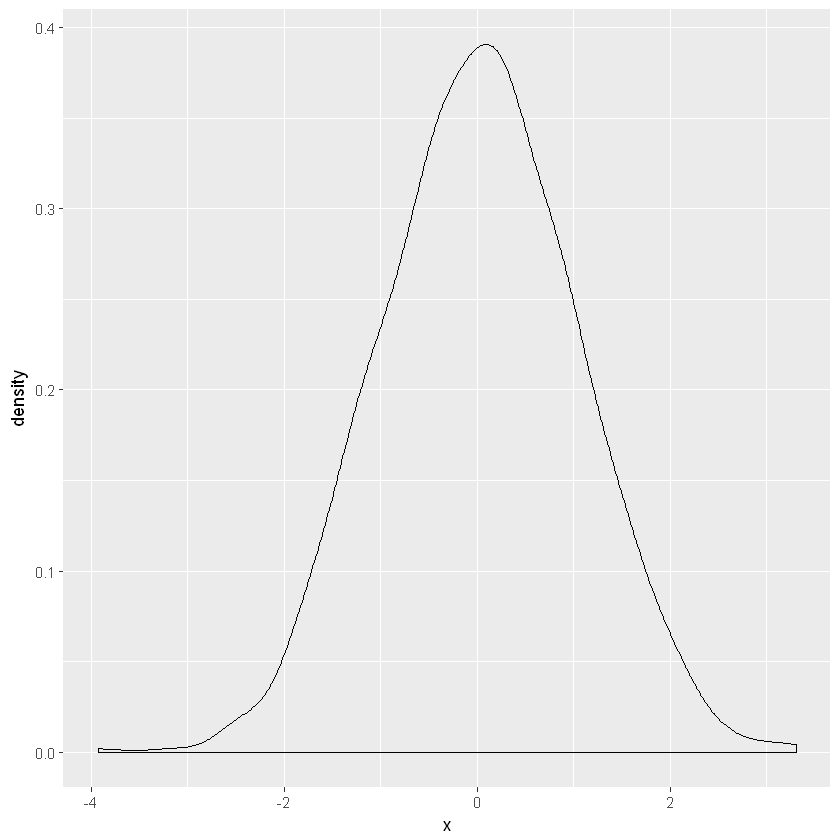

In [92]:
# density plots
qplot(x, geom="density")

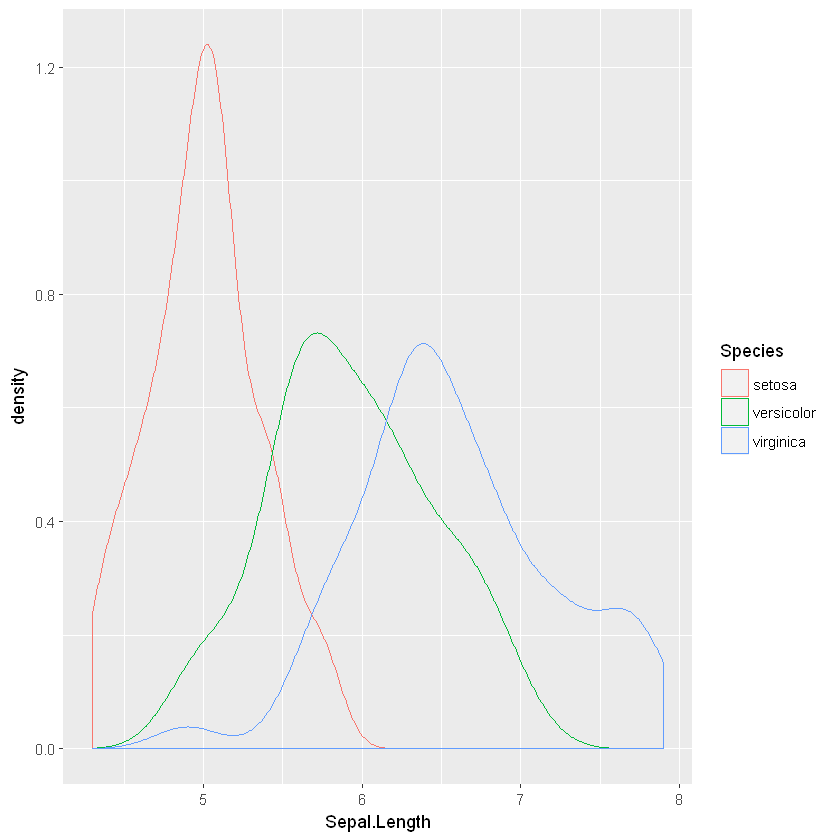

In [93]:
# density plot stratified by species
qplot(Sepal.Length, data=iris, geom="density", color=Species)

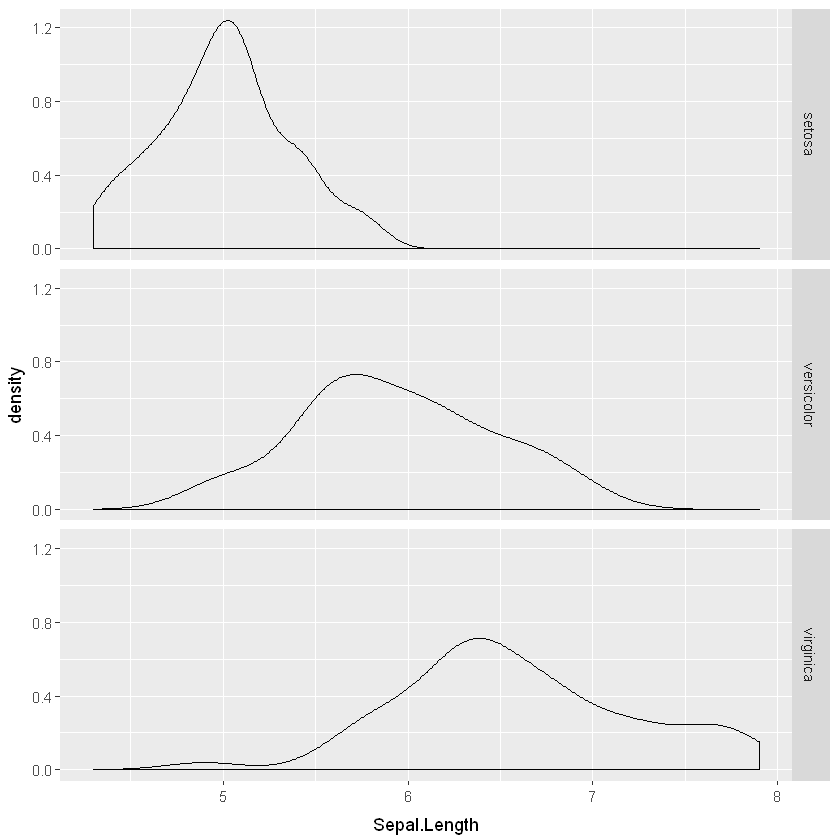

In [94]:
## Facets show several similar plots with different subsets on one sheet for easy comparison
## facetting can be used instead of aesthetics to show differences in datasets
# in one column
qplot(Sepal.Length, data=iris, geom="density", facets=Species~.)

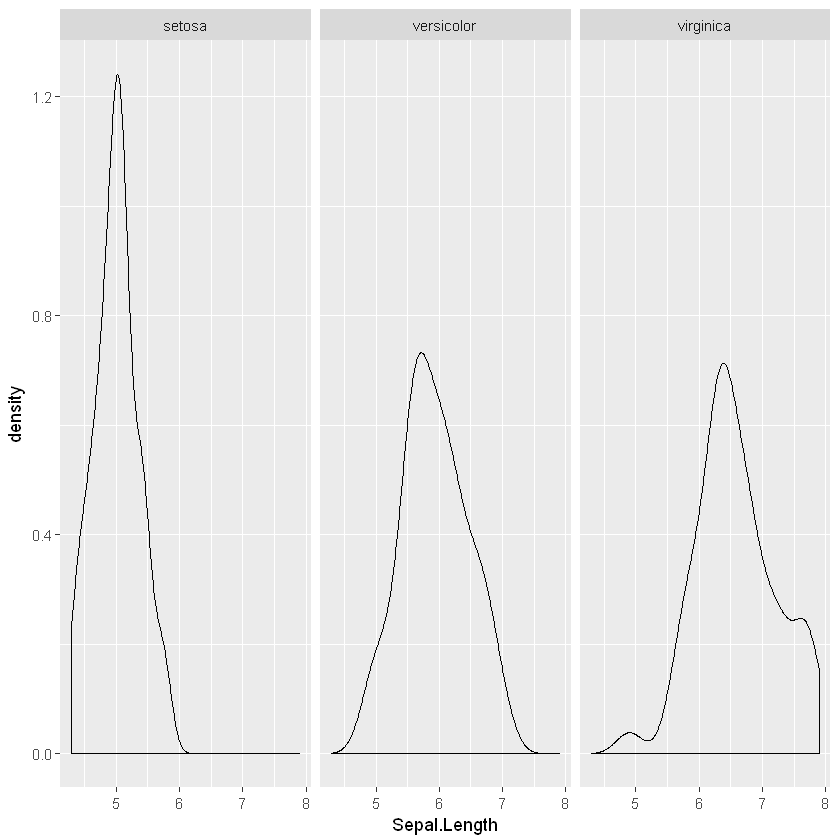

In [95]:
# in one row
qplot(Sepal.Length, data=iris, geom="density", facets=.~Species)

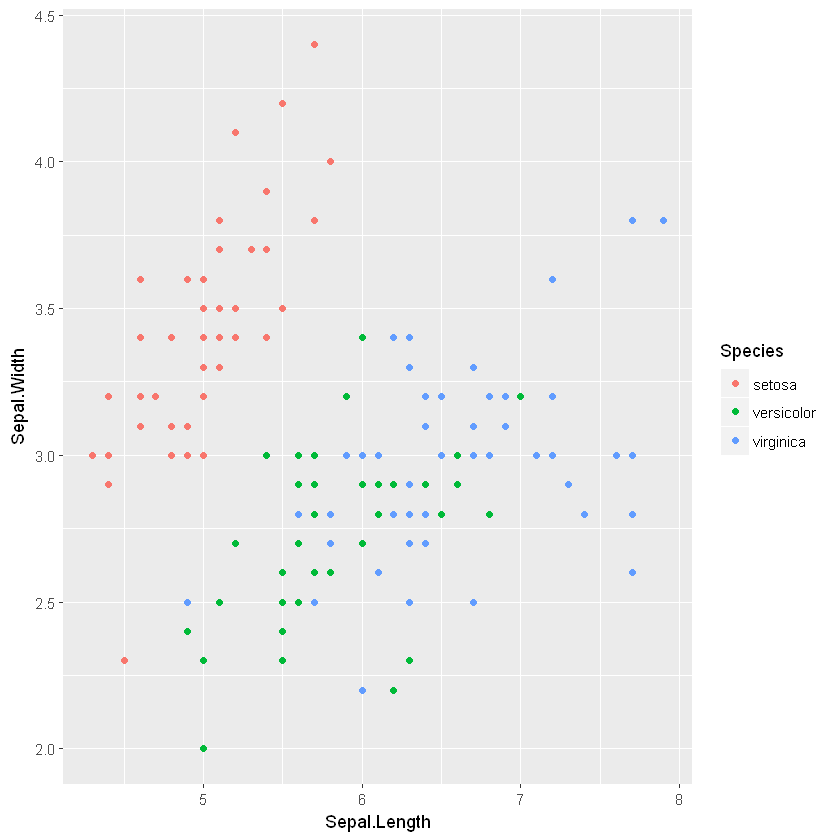

In [96]:
## Aesthetic attributes - Colour, size, shape, alpha(transpatency)
## plotting sepal length vs sepal wwidth and stratify by species
qplot(x=Sepal.Length, y=Sepal.Width, data=iris, color=Species)

Warning message:
"Using size for a discrete variable is not advised."

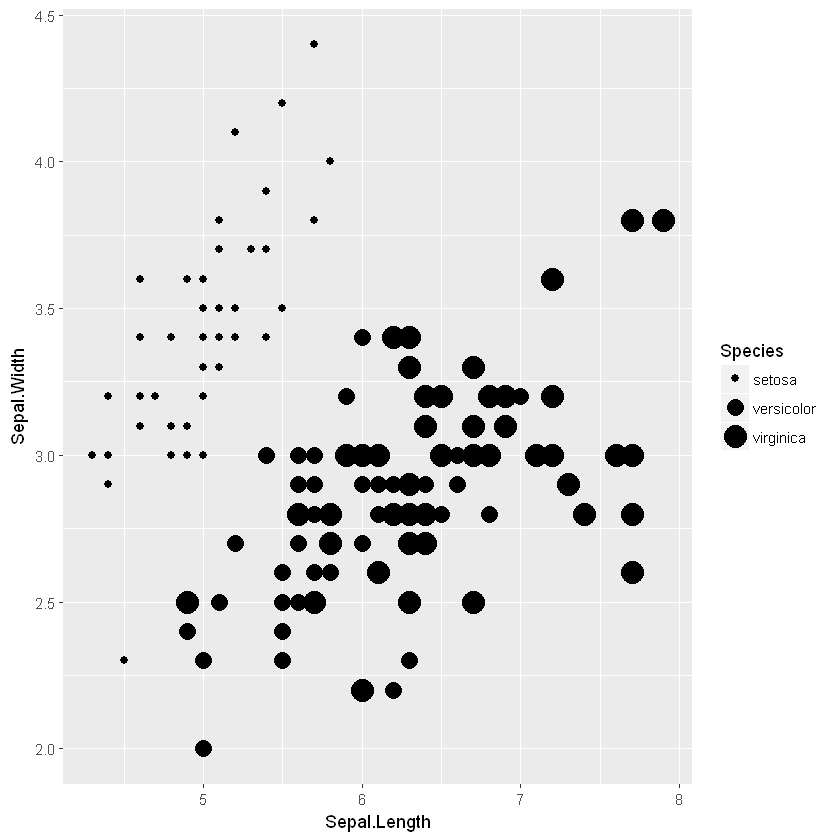

In [97]:
qplot(x=Sepal.Length, y=Sepal.Width, data=iris, size=Species)

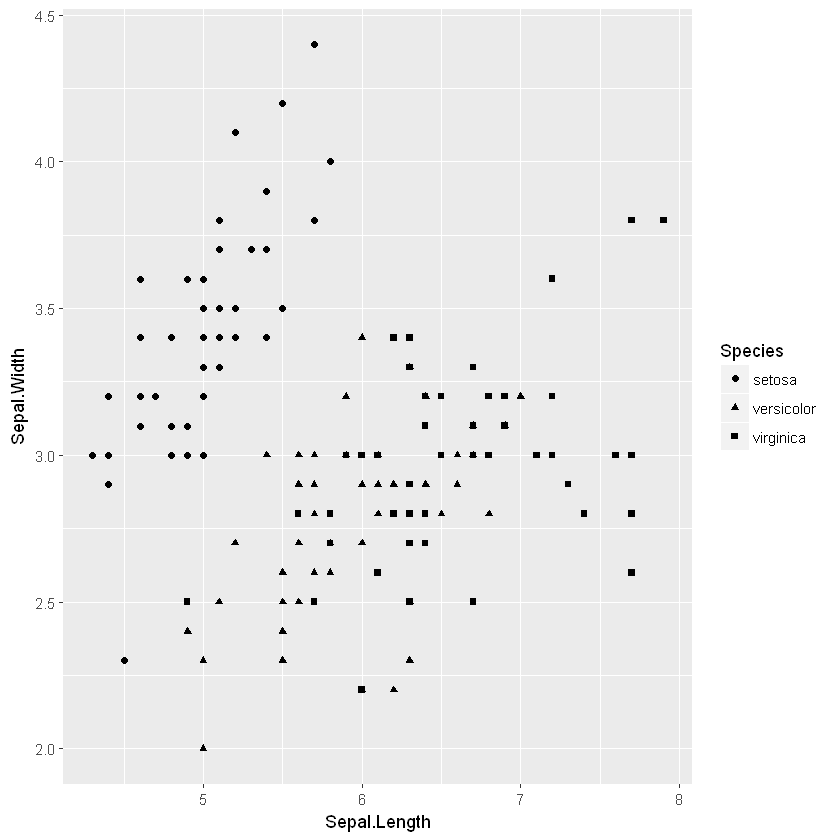

In [98]:
qplot(x=Sepal.Length, y=Sepal.Width, data=iris, shape=Species)

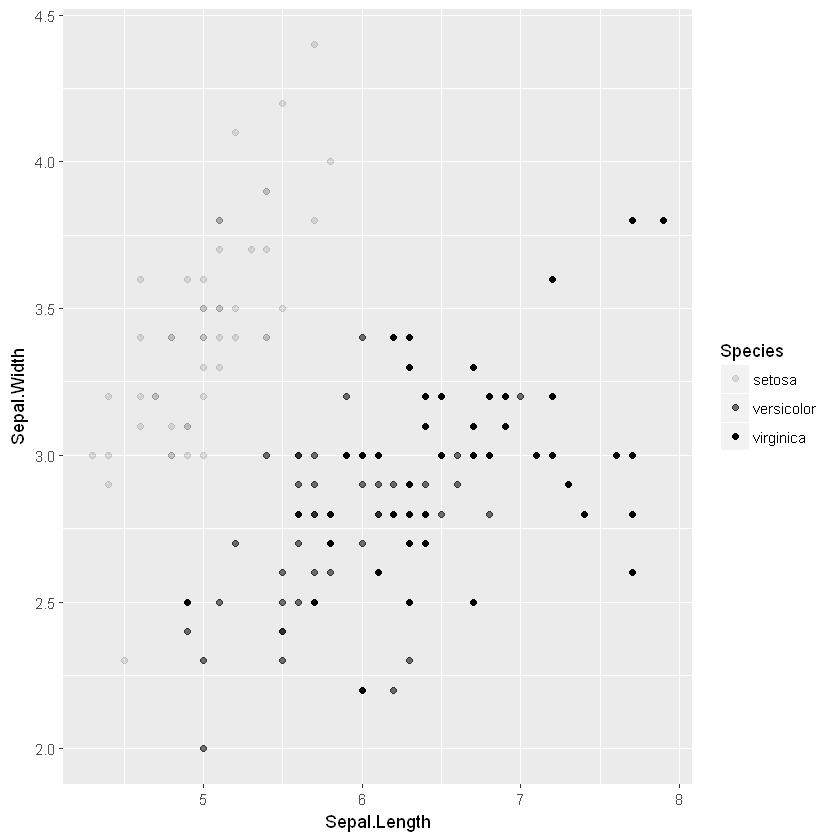

In [99]:
qplot(x=Sepal.Length, y=Sepal.Width, data=iris, alpha=Species)

Warning message:
"Using size for a discrete variable is not advised."

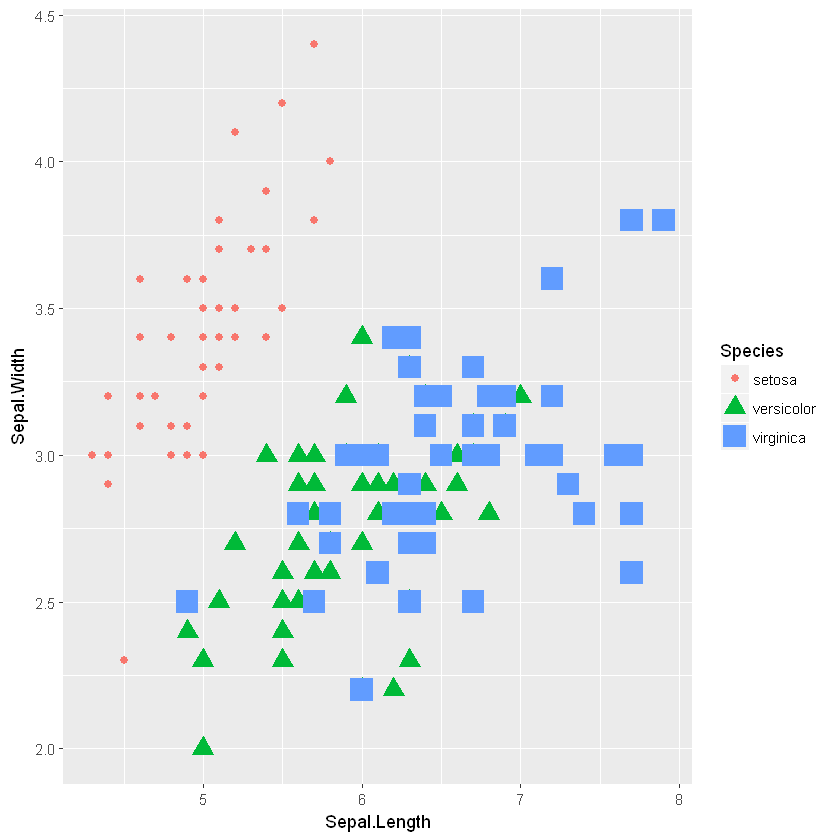

In [100]:
# combining the 3 Aesthetics 
qplot(x=Sepal.Length, y=Sepal.Width, data=iris, color=Species, size=Species, shape=Species)

In [101]:
## GGPLOT
## basic setup
## ggplot(data, aes()) + layer(geom, geom_params, stats, stats_params, data, mapping,position
## every layer can be specified on its own
## some available geoms: histogram, jitter, area, density, quantile, smooth
# stats are statistical transformations

In [102]:
#NB: ggplot works with dataframes
mydata <- data.frame(x=1:5, y=11:15, group=c("F","F","M","M","F"))
mydata

x,y,group
1,11,F
2,12,F
3,13,M
4,14,M
5,15,F


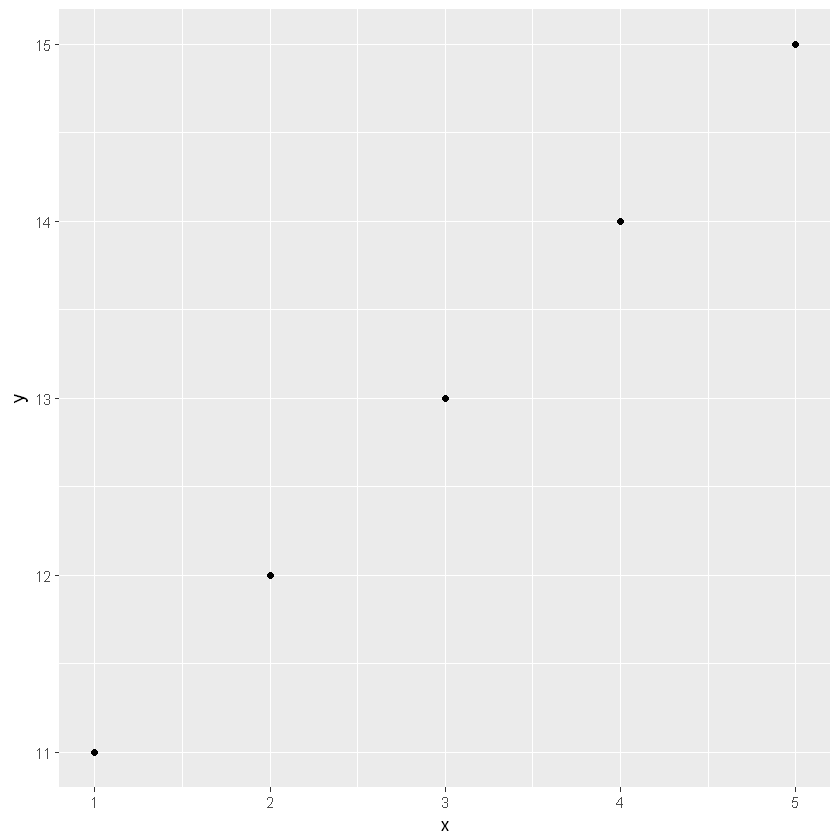

In [103]:
## scatterplots with ggplot
## we specify the dataset, and the aesthetics and the points to be mapped
p <- ggplot(data=mydata, aes(x=x,y=y))  # geom is missing
p+geom_point()

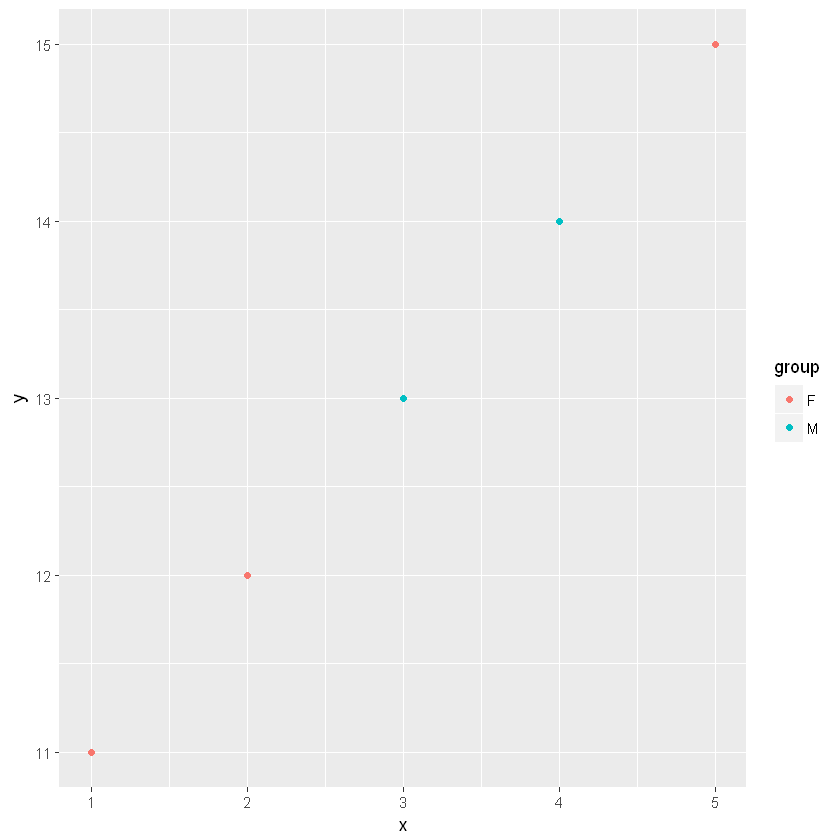

In [104]:
# now we want to put in the grouping factor(inc legend)
p + geom_point(aes(color=group))

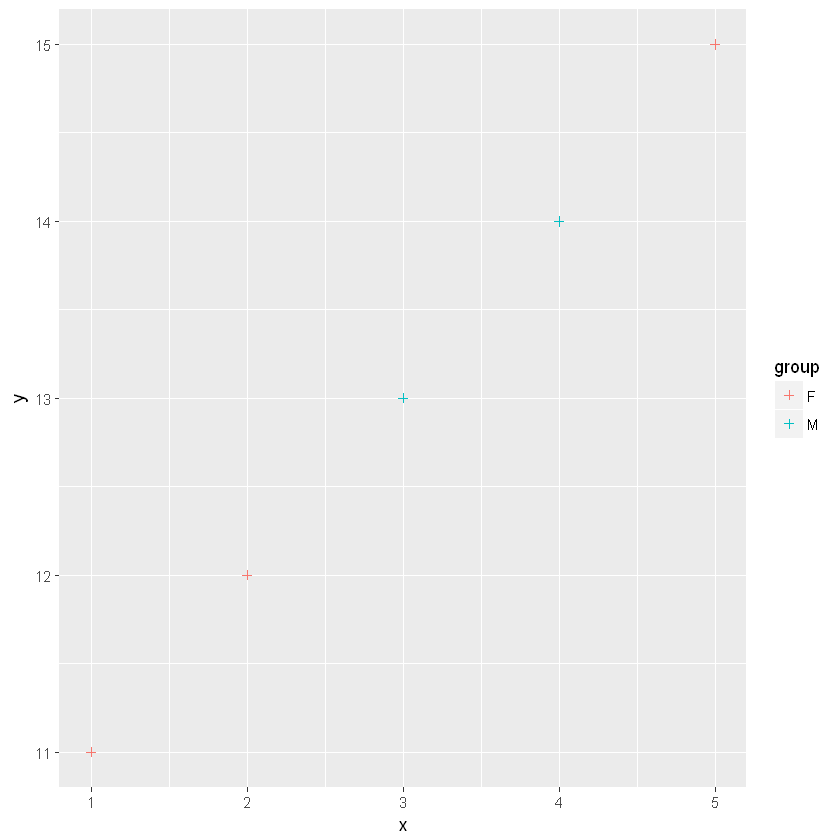

In [105]:
## adjusting the point shape (numbers are the same as in base)
p + geom_point(aes(color=group), shape=3)

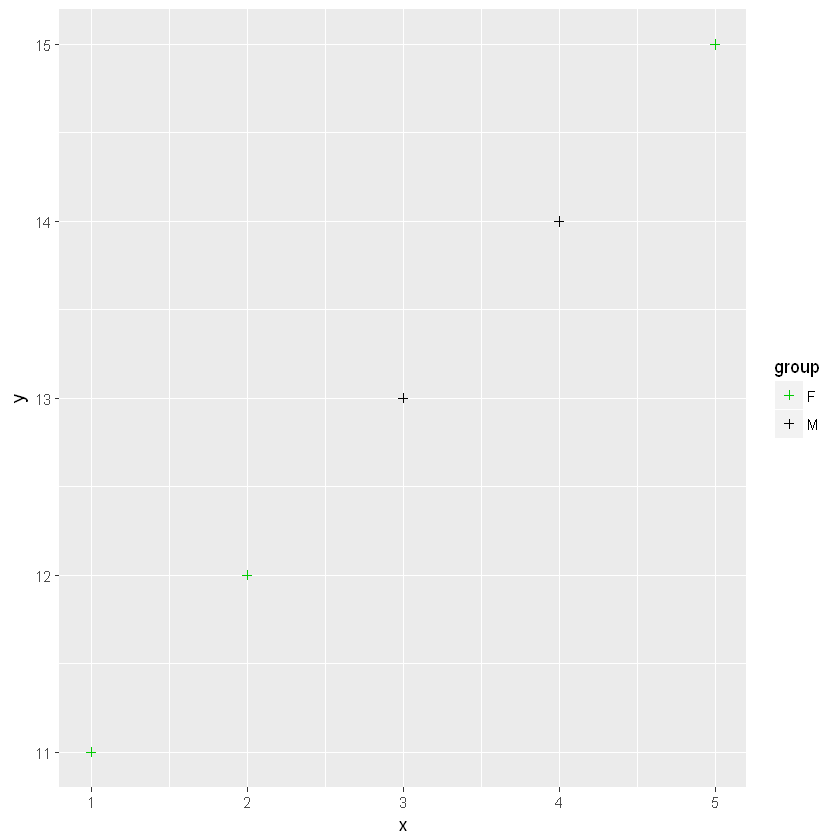

In [106]:
# adjust color according to the group
p + geom_point(aes(color=group), shape=3) + scale_color_manual(values=c(123,569))

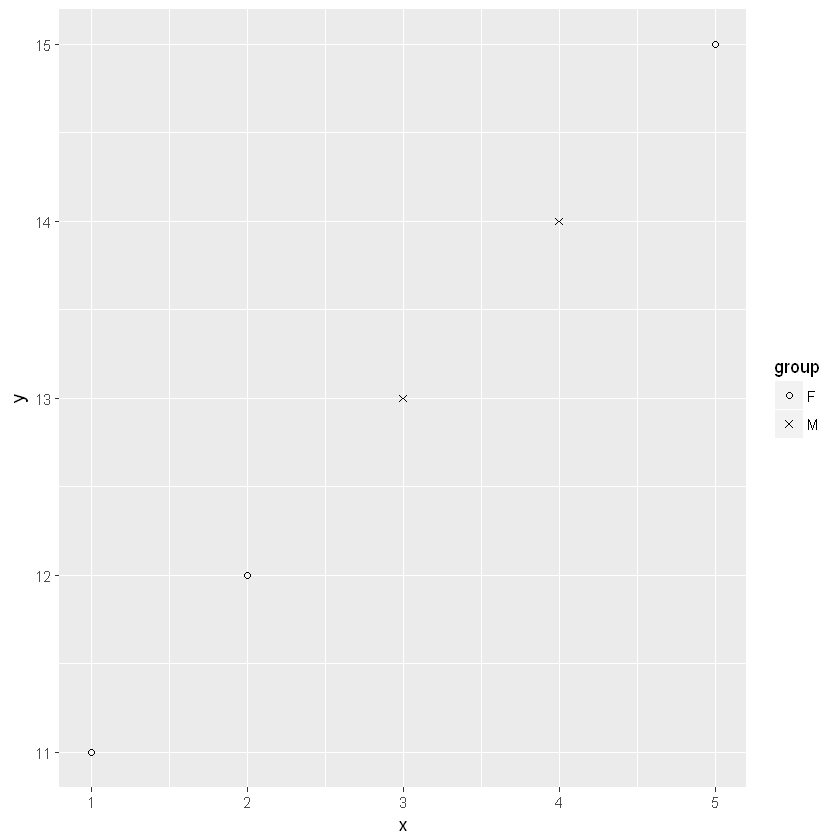

In [107]:
## manually set the shape according to the group
p + geom_point(aes(shape=group)) + scale_shape_manual(values=c(1,4))

## Formatting text with ggplot

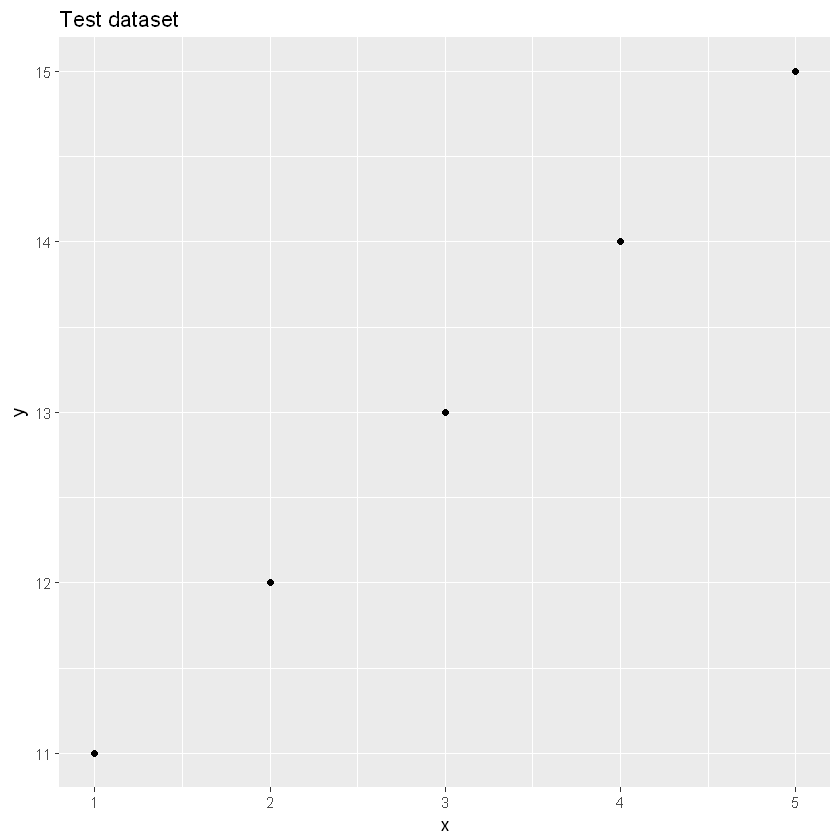

In [108]:
## adding a title
p + geom_point()+ggtitle("Test dataset")

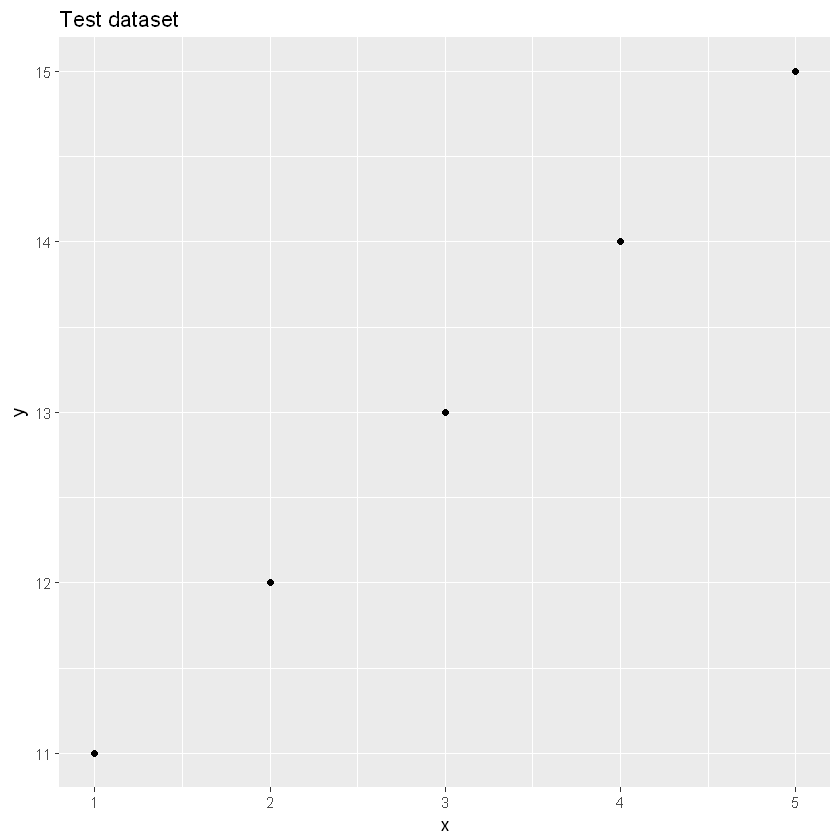

In [109]:
## using the labs call
p + geom_point() + labs(title="Test dataset")

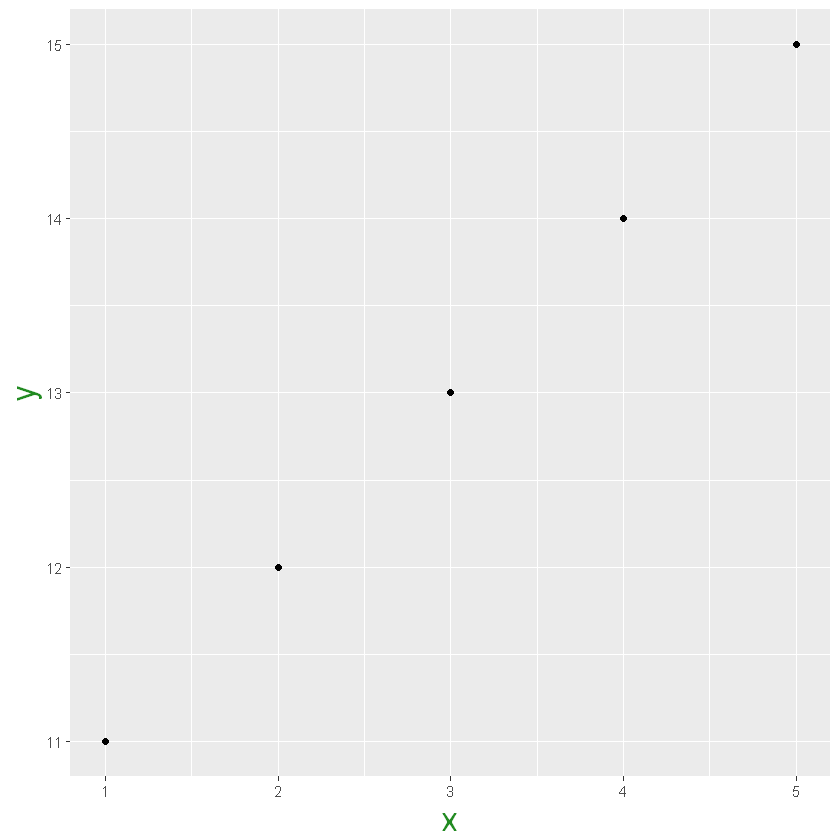

In [110]:
# formatting the axis labels
p + geom_point() + theme(axis.title=element_text(size=20, lineheight=9, color="forestgreen"))

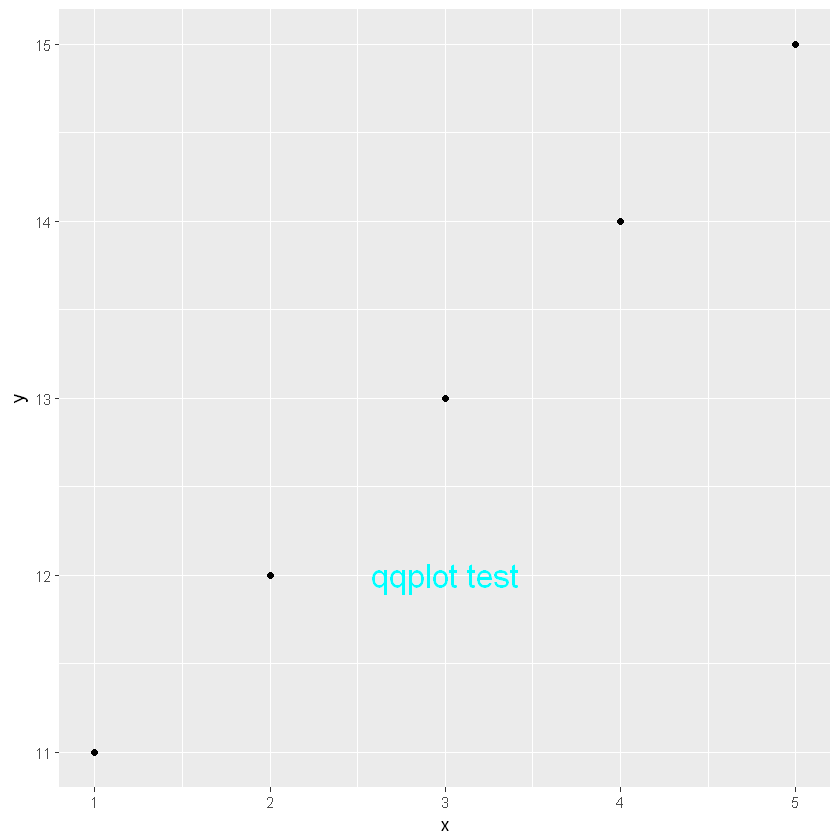

In [111]:
# insert text into the plot with annotate
p+geom_point()+annotate("text",x=3,y=12, label="qqplot test", size=7, color="765")

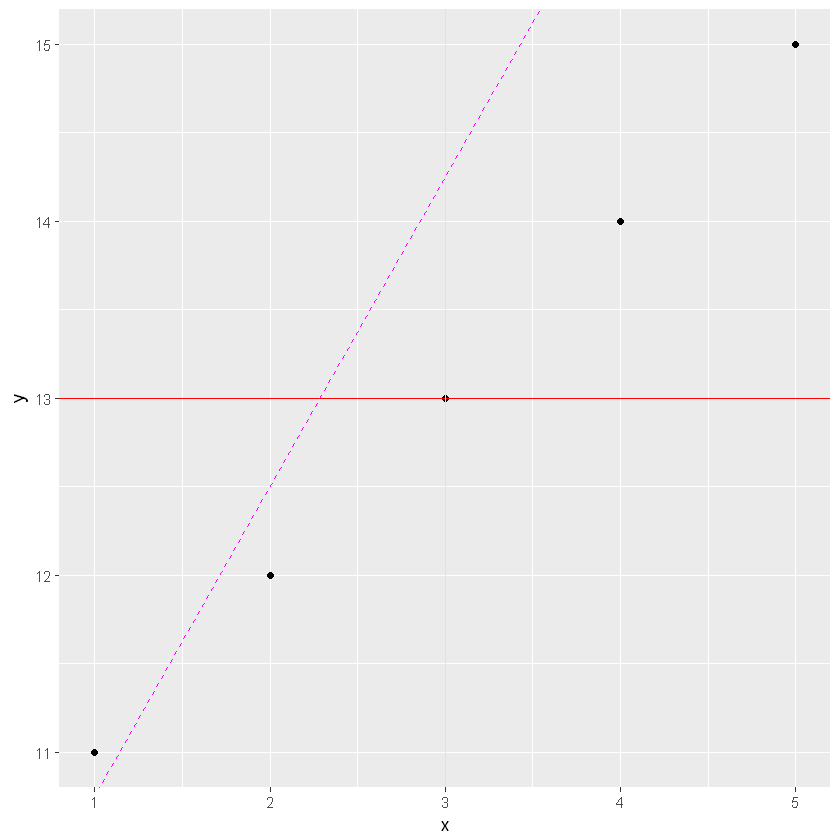

In [112]:
## adding lines - horizontal and vertical and abline
p+geom_point()+geom_hline(yintercept=13, color="red")+geom_vline(xintercept=3, color=767) +
geom_abline(intercept=9, slope=1.75, color=342, linetype="dashed")

# Histograms with ggplot2

In [113]:
histdata = data.frame(randomValues=rnorm(1000), index=1:1000)
head(histdata,3)

randomValues,index
0.07635787,1
-0.04214003,2
-1.51933937,3


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


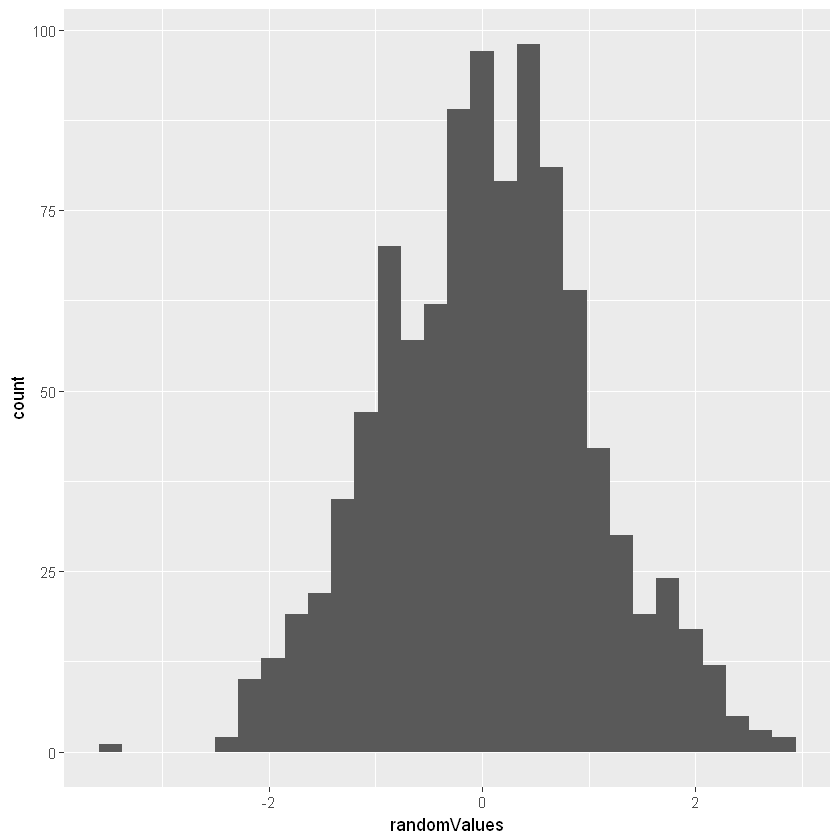

In [114]:
# basic histogram
ggplot(histdata, aes(x=randomValues)) + geom_histogram()

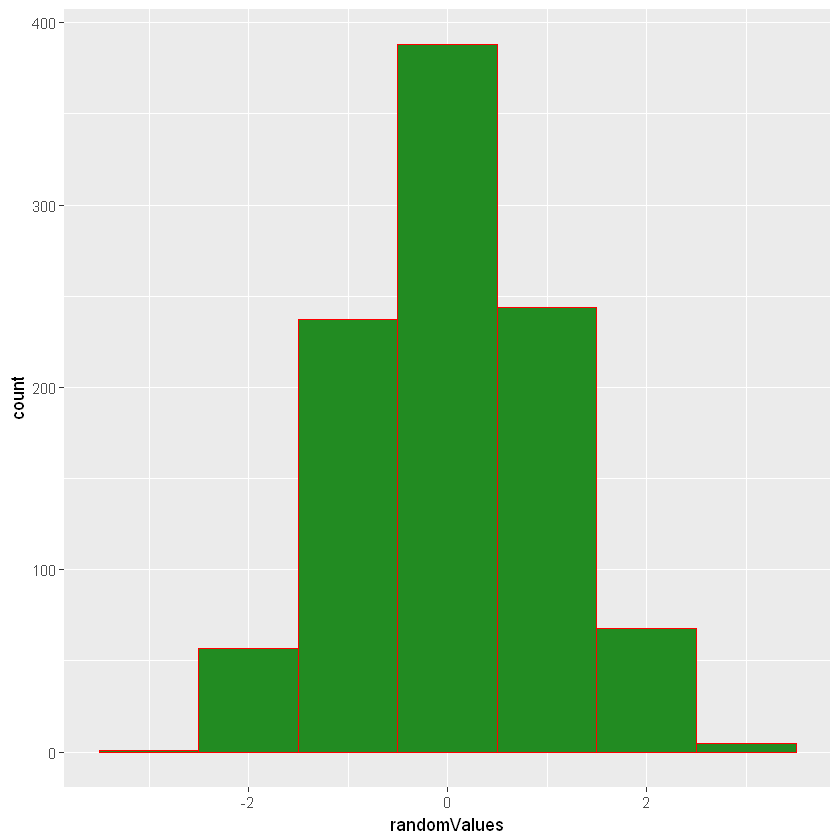

In [116]:
# using binwidth argument to specify bin width
ggplot(histdata, aes(x=randomValues)) + geom_histogram(binwidth=1, fill="forestgreen", colour="red")

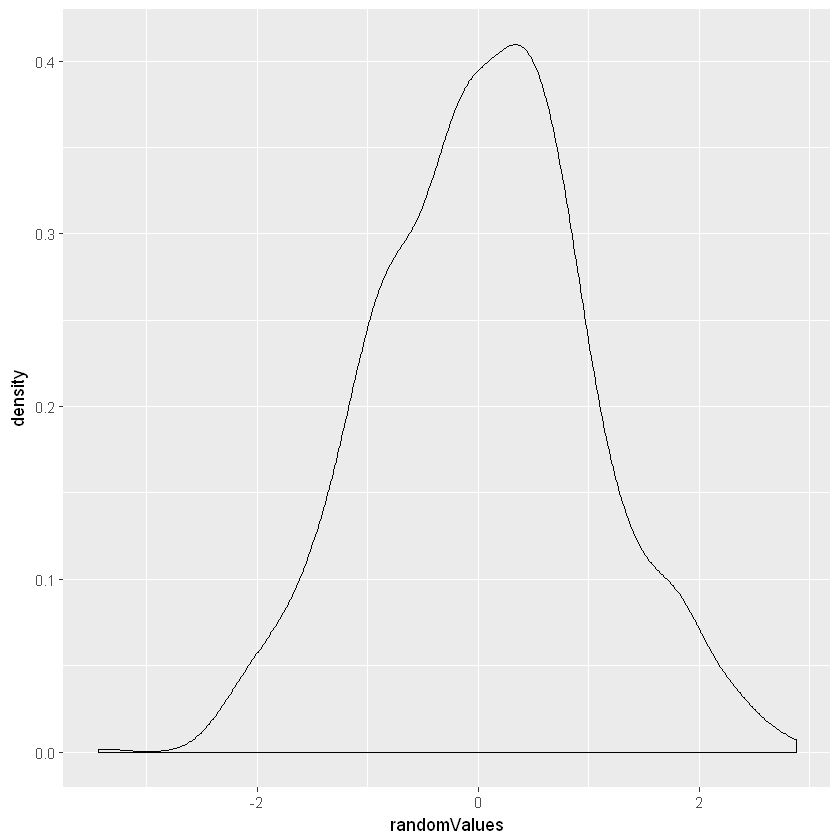

In [117]:
# a density plot gives similar information
ggplot(histdata, aes(x=randomValues)) + geom_density()

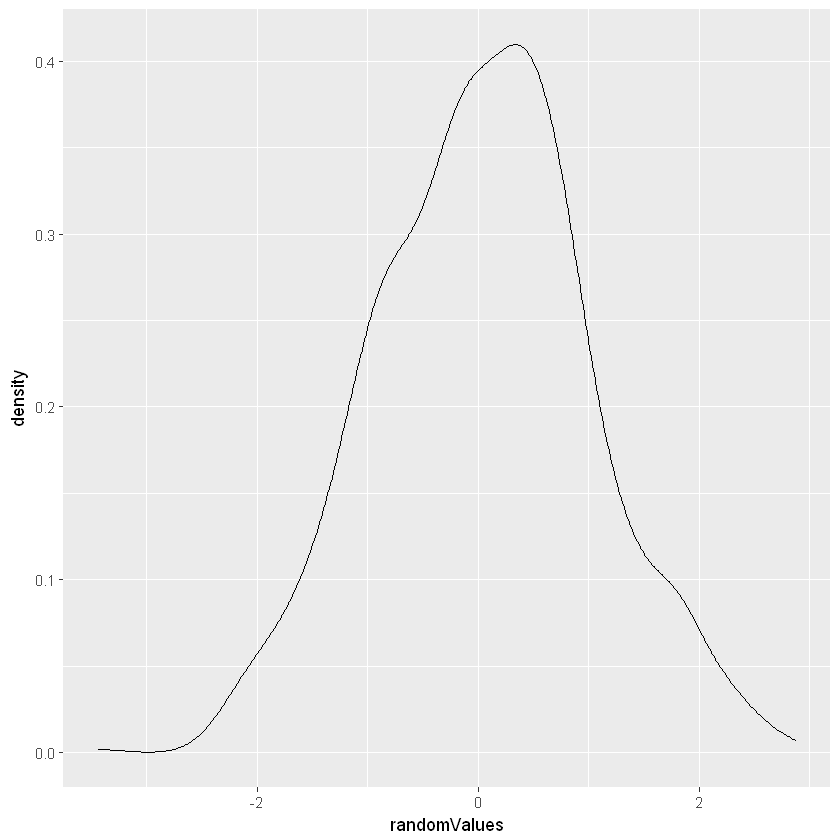

In [118]:
ggplot(histdata, aes(x=randomValues)) + geom_line(stat="density")

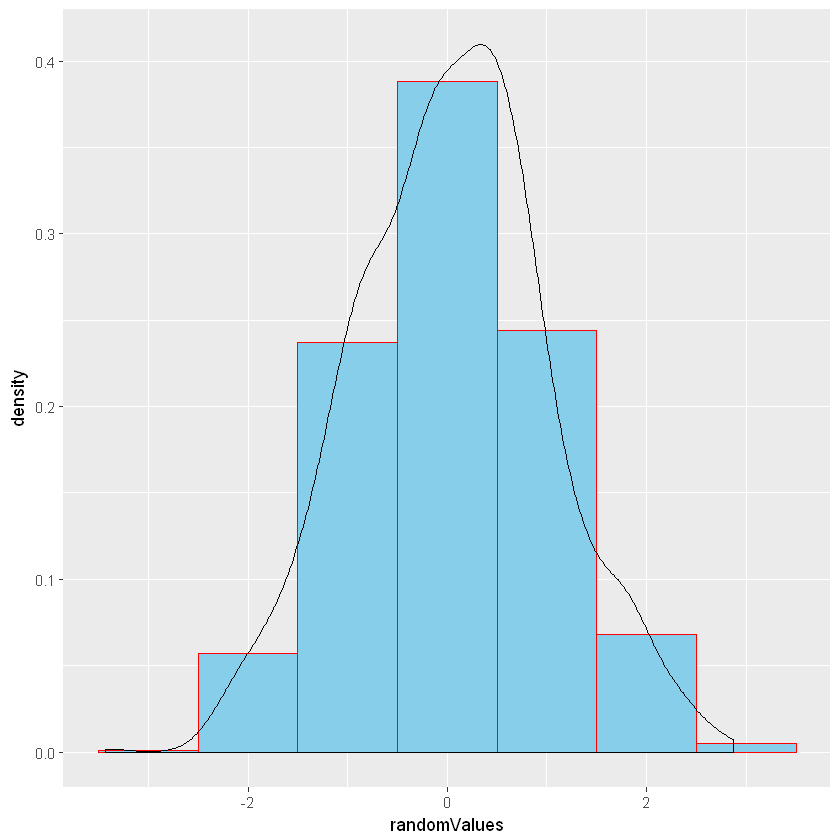

In [121]:
# combine histogram and density plot
ggplot(histdata, 
       aes(x=randomValues, y=..density..)) + geom_histogram(binwidth=1, fill="skyblue", color="red") +
geom_density()

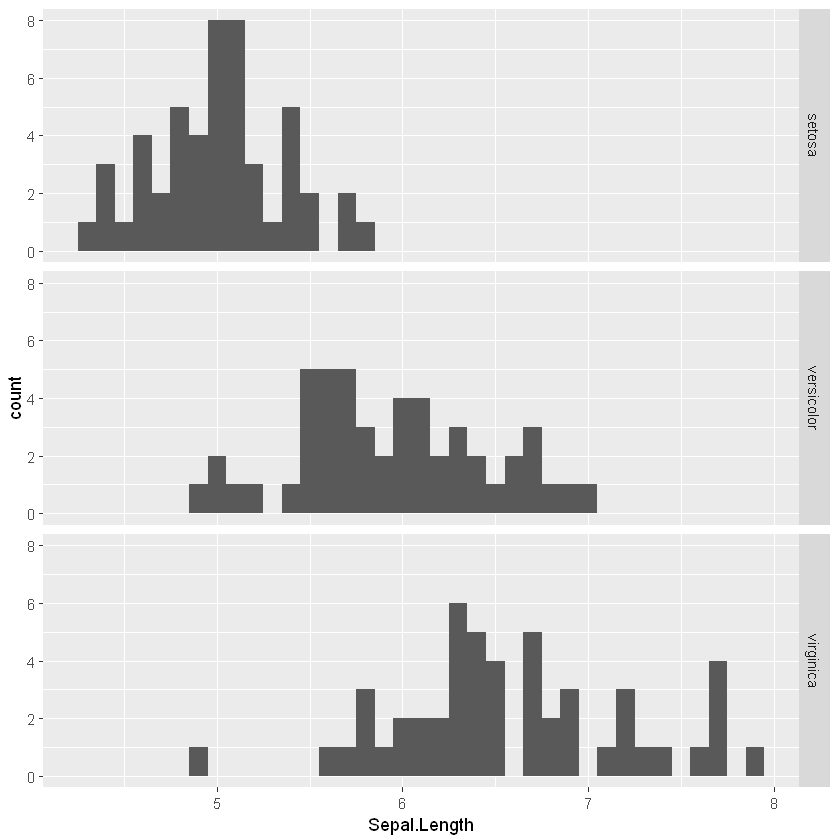

In [124]:
# ways to compare data in histograms
## grouped histograms by using facet
ggplot(iris, aes(Sepal.Length)) + geom_histogram(binwidth=0.1,) + facet_grid(Species~.)

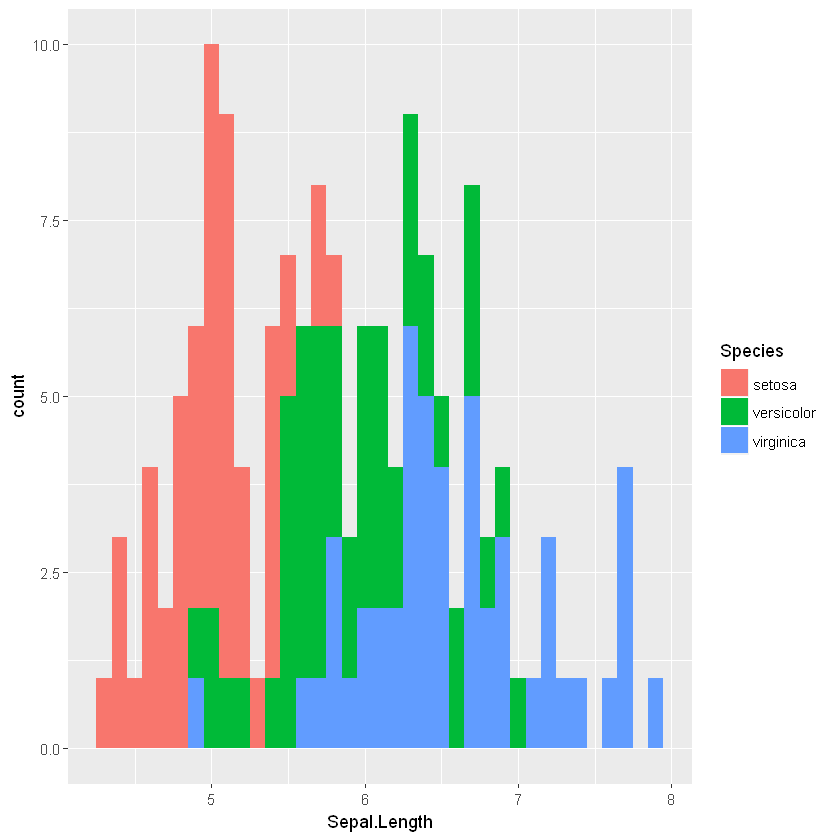

In [125]:
# grouped histograms using different color fills
ggplot(iris, aes(Sepal.Length, fill=Species)) + geom_histogram(binwidth=0.1)

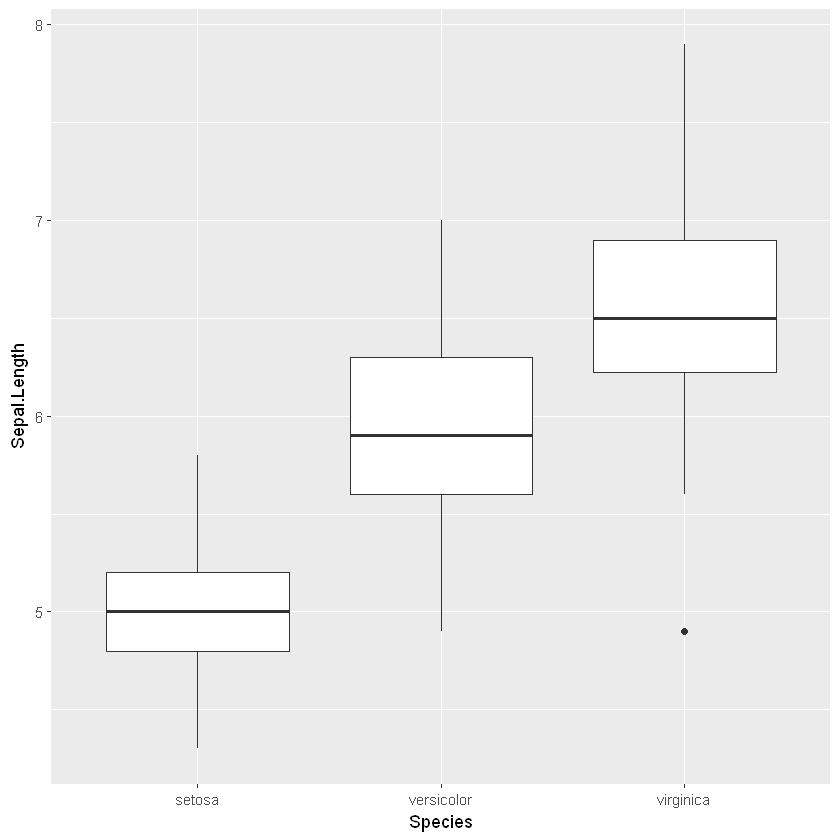

In [127]:
## Boxplot with gglpot
ggplot(iris, aes(y=Sepal.Length, x=Species)) + geom_boxplot()

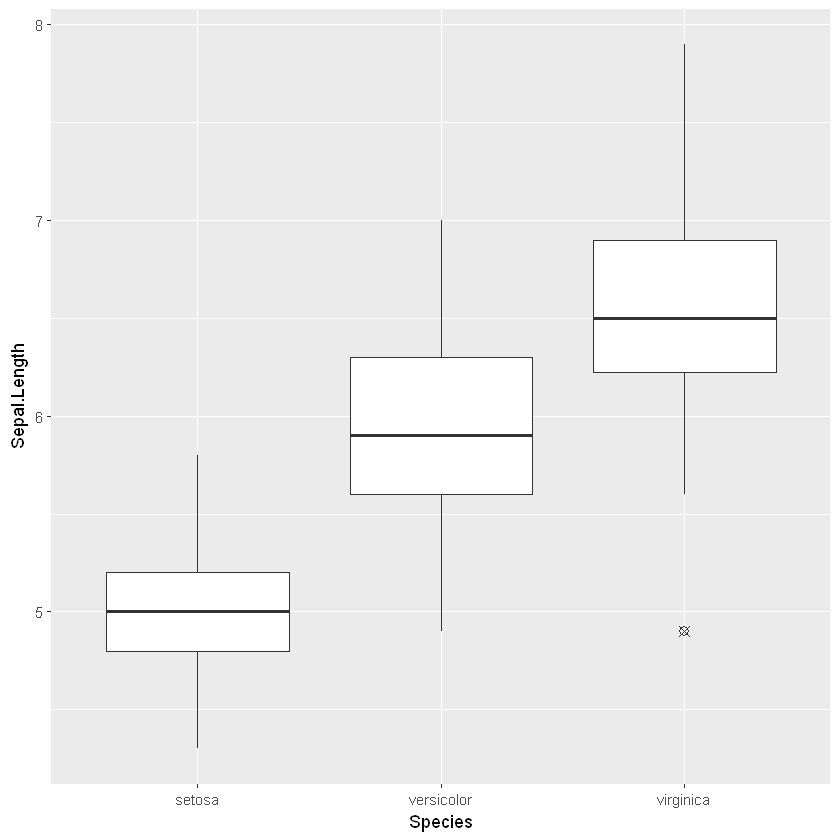

In [128]:
# modifying the outlier shape
ggplot(iris, aes(y=Sepal.Length, x=Species)) + geom_boxplot(outlier.size=2.5, outlier.shape=13)

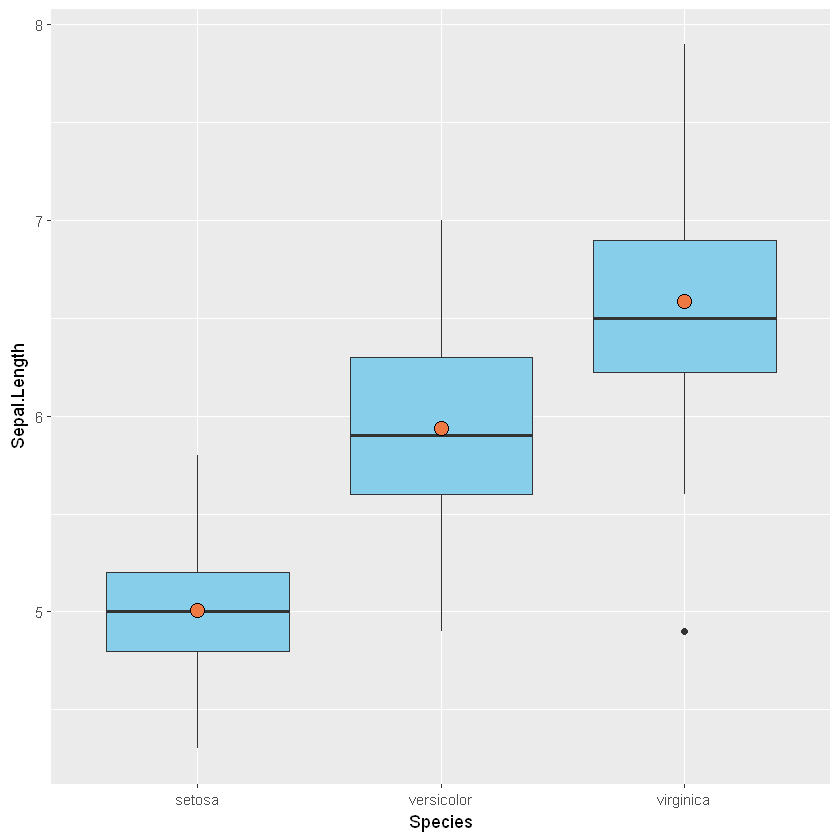

In [133]:
# incorporating means in a boxplot
ggplot(iris, aes(y=Sepal.Length, x=Species)) + geom_boxplot(fill="skyblue") +
stat_summary(fun.y="mean", geom="point", shape=21, size=4, fill="sienna2")

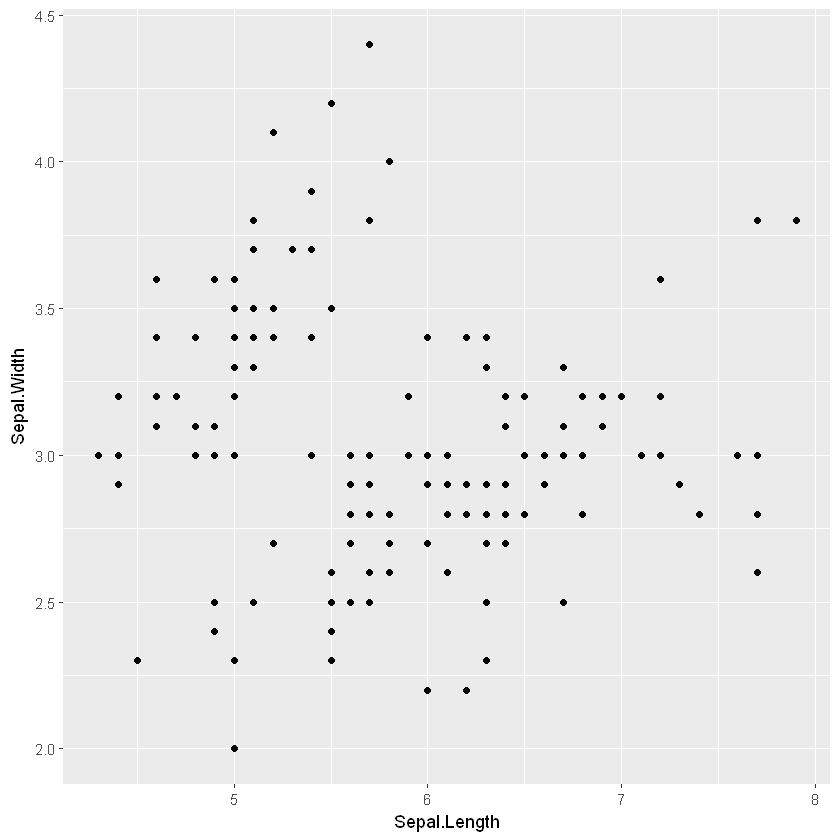

In [134]:
## difference between mapping and setting
# mapping: you need to specify the aes - the values u want to visualize


# setting the coloration
ggplot(iris, aes(Sepal.Length, Sepal.Width, color=Species)) + geom_point(color="grey2")

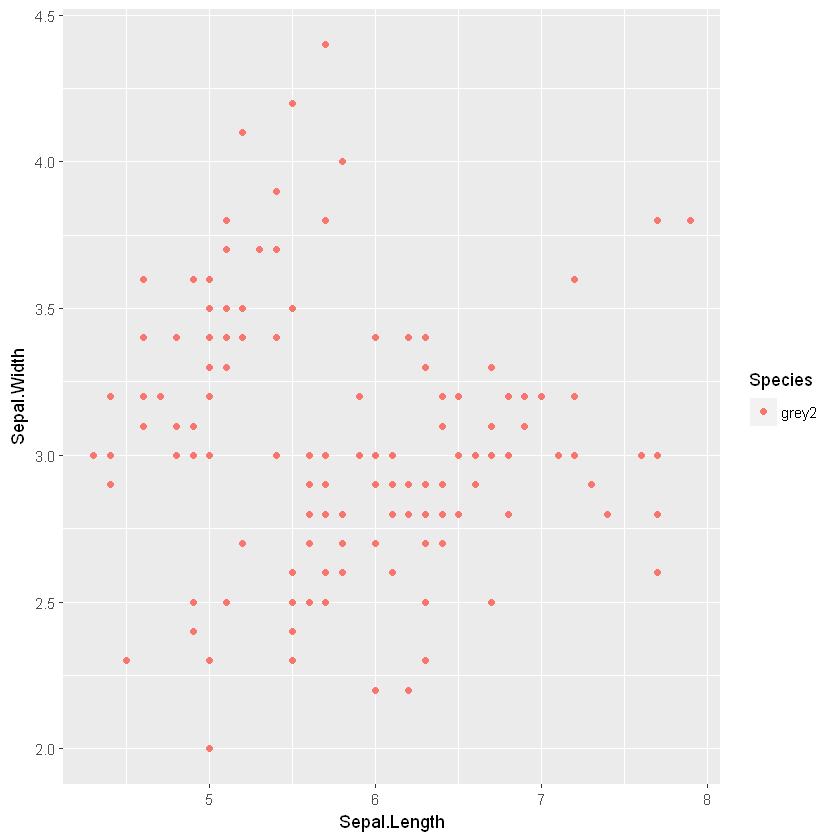

In [138]:
## mapping
ggplot(iris, aes(Sepal.Length, Sepal.Width, color=Species)) + geom_point(aes(color="grey2"))